In [1]:
# Packages
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt

from utility_code.utility import utils

In [5]:
#import csv's

train_import = pd.read_csv("ucla2020-cs145-covid19-prediction/train.csv")
test_import = pd.read_csv("ucla2020-cs145-covid19-prediction/test.csv")
graph = pd.read_csv("ucla2020-cs145-covid19-prediction/graph.csv")

# print(train_import.loc[train_import['Province_State'] == 'Louisiana']['Deaths'].to_list())
train_import


,ID,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,Alabama,04-12-2020,3563,93,NaN,3470.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945
1,1,Alaska,04-12-2020,272,8,66.0,264.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059
2,2,Arizona,04-12-2020,3542,115,NaN,3427.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN
3,3,Arkansas,04-12-2020,1280,27,367.0,1253.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250
4,4,California,04-12-2020,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,2.812020,485.423869,22.961176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,7095,Virginia,08-31-2020,120575,2580,15085.0,102910.0,1412.626461,1586551.0,NaN,2.139747,18587.633628,NaN
7096,7096,Washington,08-31-2020,74635,1915,NaN,72720.0,980.118828,1461354.0,NaN,2.565820,19190.735838,NaN
7097,7097,West Virginia,08-31-2020,10249,215,8017.0,2017.0,571.883891,436047.0,NaN,2.097766,24330.984010,NaN
7098,7098,Wisconsin,08-31-2020,75603,1122,67234.0,7247.0,1298.477578,1253422.0,NaN,1.484068,21527.457417,NaN


In [7]:
#normalize by number of tests
train = train_import
train['Population'] = train['Confirmed'].divide(train['Incident_Rate'])*1e5
train['Active/Population'] = train['Active'].divide(train['Population'])
train['Deaths/Population'] = train['Deaths'].divide(train['Population'])
train['Active/People_Tested*Population'] = train['Active']/train['People_Tested']*train['Population']
train['Recovered/Population'] = train['Recovered']/train['Population']


confirmed = train['Confirmed'].to_list()
daily = [confirmed[i]-confirmed[i-50] for i in range(len(confirmed)) if i-50 >= 0]
for i in range(50):
    daily.insert(0,0)

train['New_Cases'] = daily

tests = train['People_Tested'].to_list()
dailyTests = [tests[i]-tests[i-50] for i in range(len(tests)) if i-50 >= 0]
for i in range(50):
    dailyTests.insert(0,0)

train['New_Tests'] = dailyTests

train['New_Cases/New_Tests'] = train['New_Cases']/train['New_Tests']

train_import = train
train_import
# population = {}
# for state in states:
#     population[state] = (statesdata[state]['Confirmed'].iloc[0]/ statesdata[state]['Incident_Rate'].iloc[0])*1e5


,ID,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,...,Testing_Rate,Hospitalization_Rate,Population,Active/Population,Deaths/Population,Active/People_Tested*Population,Recovered/Population,New_Cases,New_Tests,New_Cases/New_Tests
0,0,Alabama,04-12-2020,3563,93,NaN,3470.0,75.988020,21583.0,437.0,...,460.300152,12.264945,4.688897e+06,0.000740,0.000020,7.538559e+05,NaN,0,0.0,NaN
1,1,Alaska,04-12-2020,272,8,66.0,264.0,45.504049,8038.0,31.0,...,1344.711576,11.397059,5.977490e+05,0.000442,0.000013,1.963246e+04,0.000110,0,0.0,NaN
2,2,Arizona,04-12-2020,3542,115,NaN,3427.0,48.662422,42109.0,NaN,...,578.522286,NaN,7.278717e+06,0.000471,0.000016,5.923713e+05,NaN,0,0.0,NaN
3,3,Arkansas,04-12-2020,1280,27,367.0,1253.0,49.439423,19722.0,130.0,...,761.753354,10.156250,2.589027e+06,0.000484,0.000010,1.644889e+05,0.000142,0,0.0,NaN
4,4,California,04-12-2020,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,...,485.423869,22.961176,3.920862e+07,0.000565,0.000016,4.564052e+06,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,7095,Virginia,08-31-2020,120575,2580,15085.0,102910.0,1412.626461,1586551.0,NaN,...,18587.633628,NaN,8.535519e+06,0.012057,0.000302,5.536477e+05,0.001767,846,13124.0,0.064462
7096,7096,Washington,08-31-2020,74635,1915,NaN,72720.0,980.118828,1461354.0,NaN,...,19190.735838,NaN,7.614893e+06,0.009550,0.000251,3.789328e+05,NaN,315,0.0,inf
7097,7097,West Virginia,08-31-2020,10249,215,8017.0,2017.0,571.883891,436047.0,NaN,...,24330.984010,NaN,1.792147e+06,0.001125,0.000120,8.289841e+03,0.004473,140,4925.0,0.028426
7098,7098,Wisconsin,08-31-2020,75603,1122,67234.0,7247.0,1298.477578,1253422.0,NaN,...,21527.457417,NaN,5.822434e+06,0.001245,0.000193,3.366398e+04,0.011547,266,3820.0,0.069634


C:\Users\shail\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


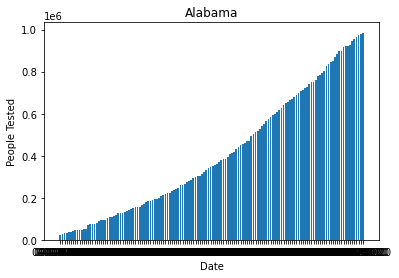

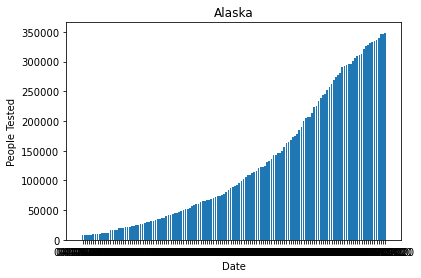

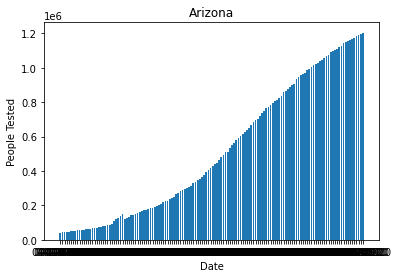

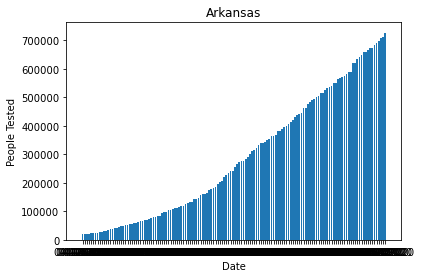

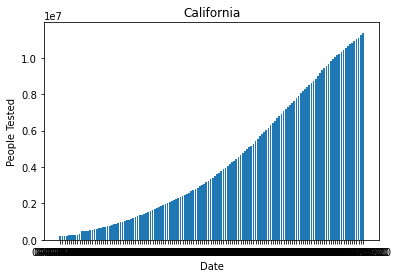

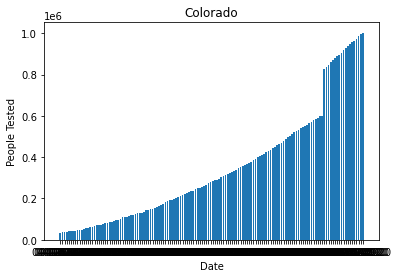

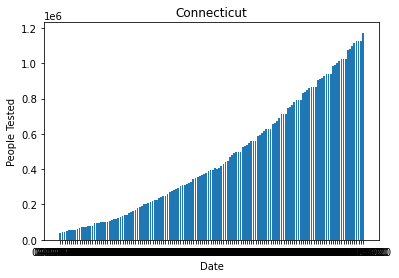

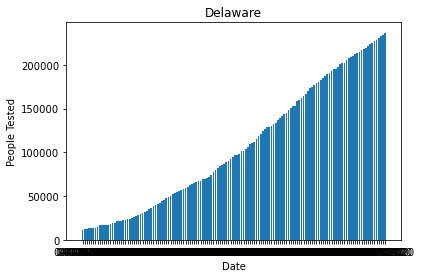

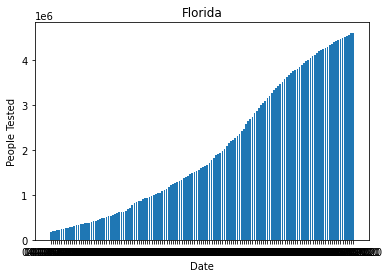

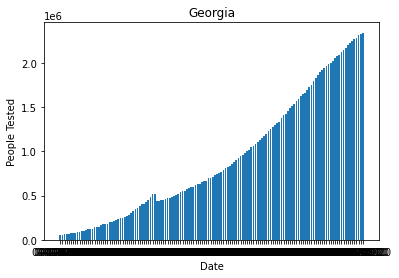

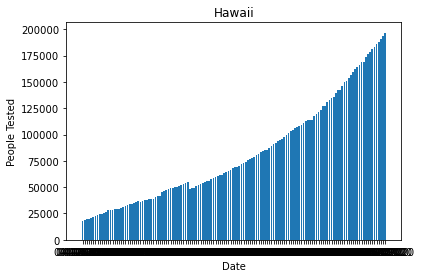

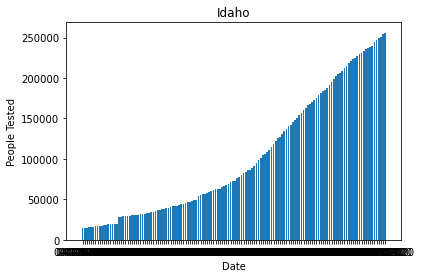

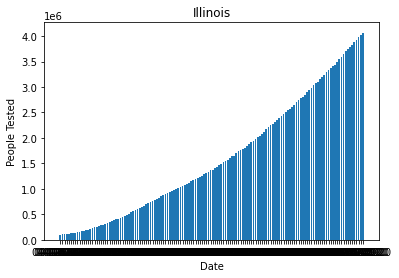

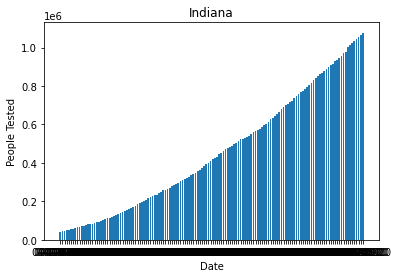

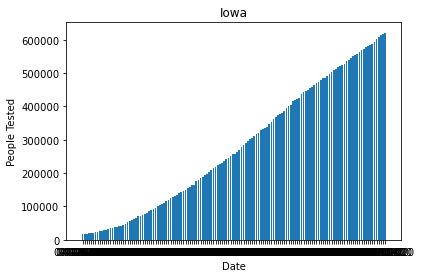

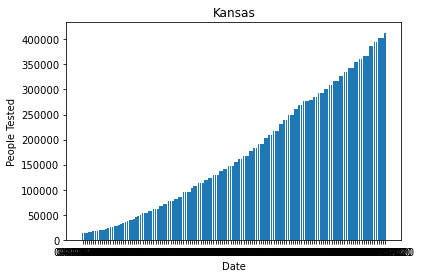

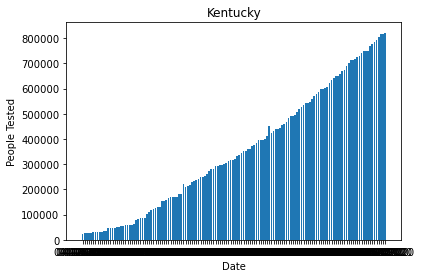

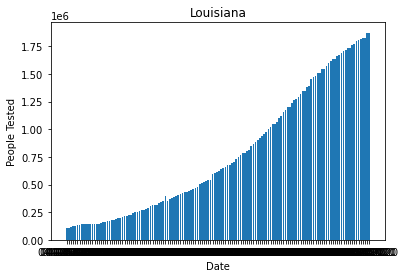

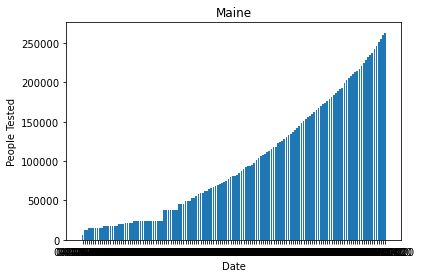

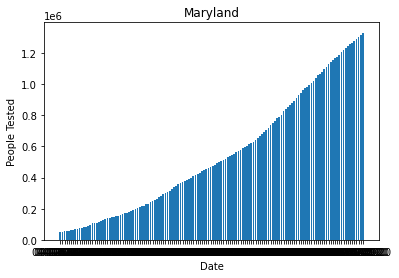

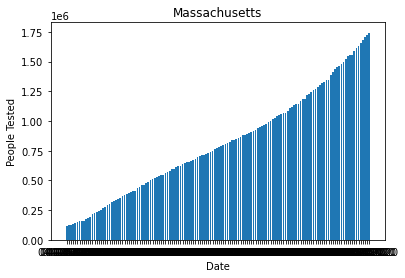

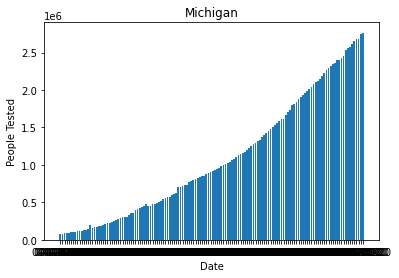

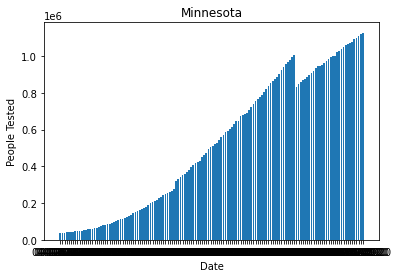

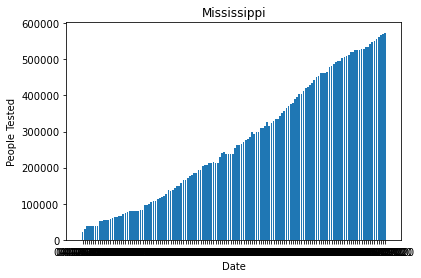

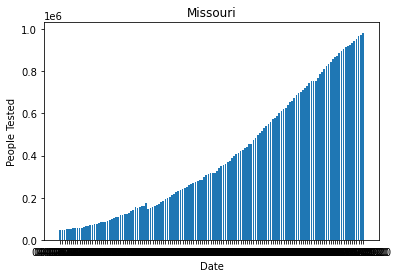

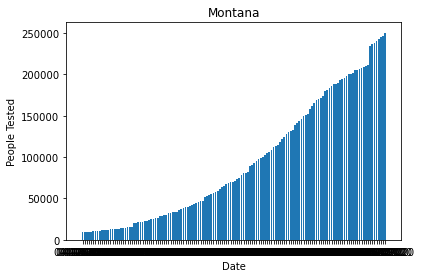

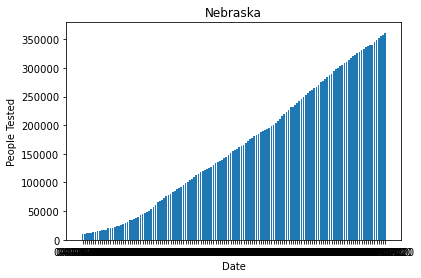

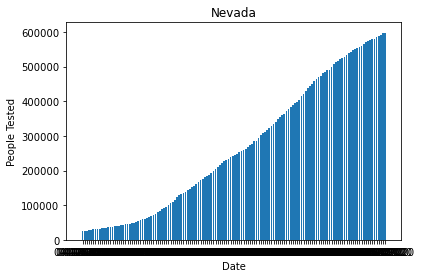

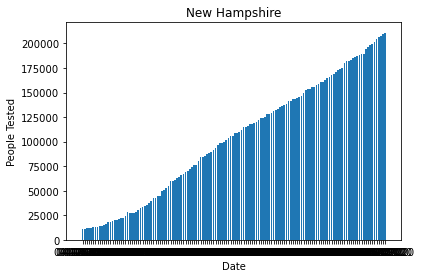

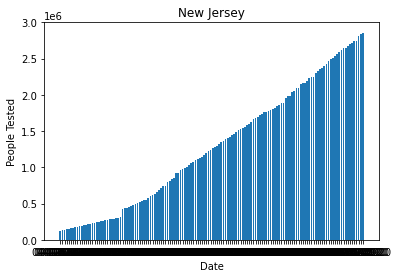

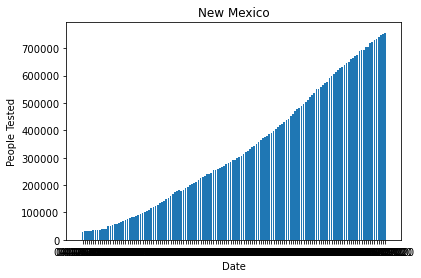

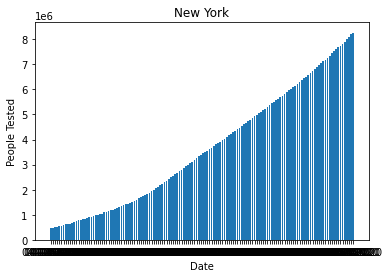

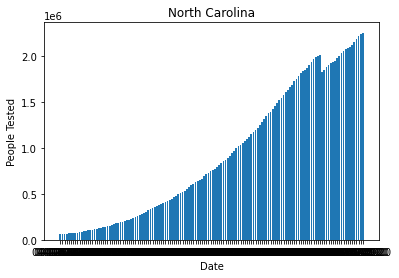

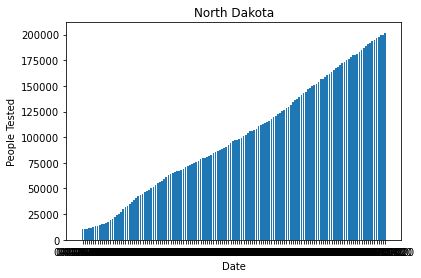

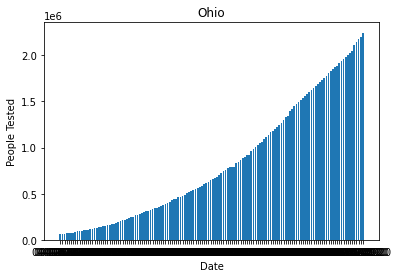

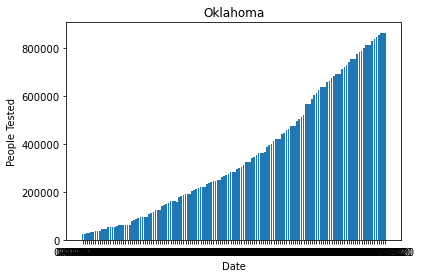

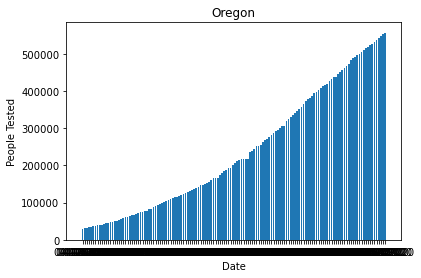

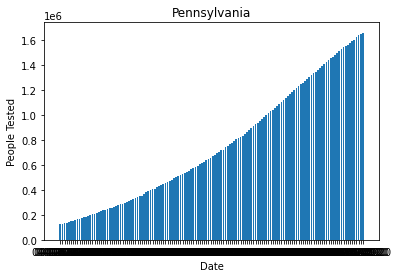

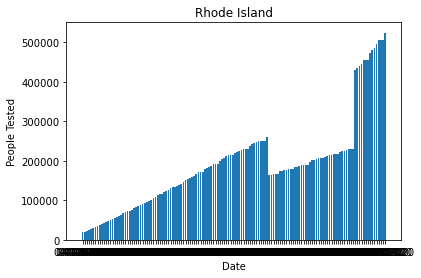

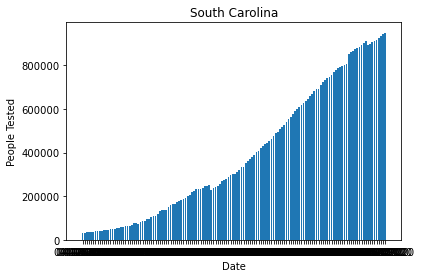

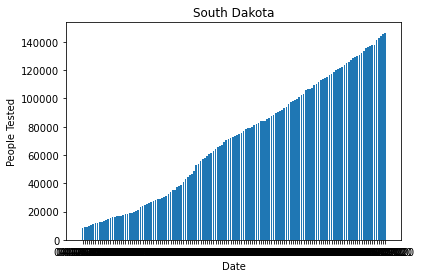

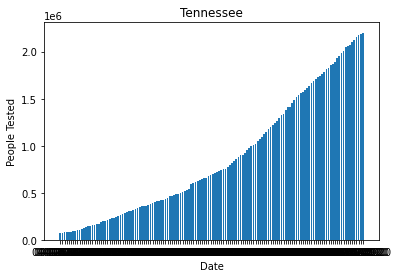

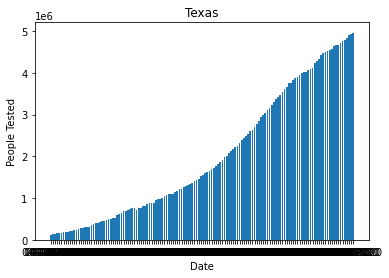

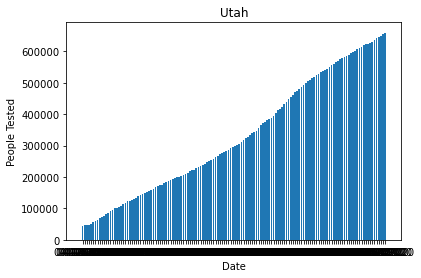

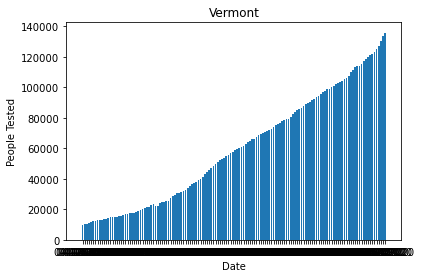

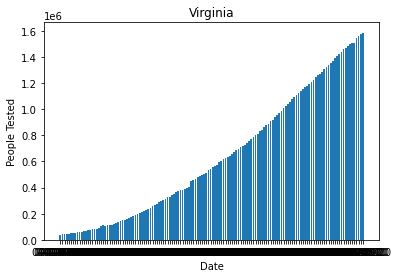

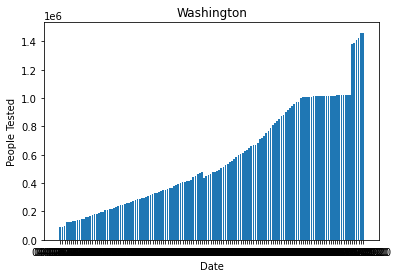

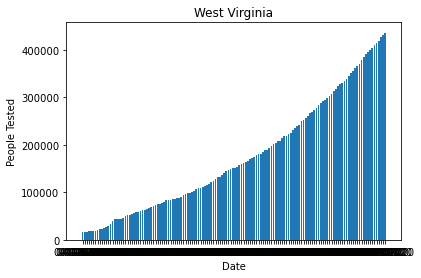

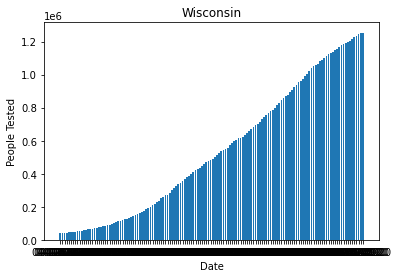

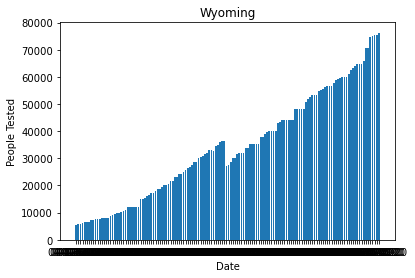

In [10]:
#run this block for date v/s test per state
for curr_state in train_import['Province_State'].unique():
    state = train_import.loc[train_import['Province_State'] == curr_state]
    fig, axl = plt.subplots()
    axl.title.set_text(curr_state)
    plt.xlabel('Date')
    plt.ylabel('People Tested')
    axl.bar(state['Date'].to_list(), state['People_Tested'].to_list())


plt.show()

C:\Users\shail\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


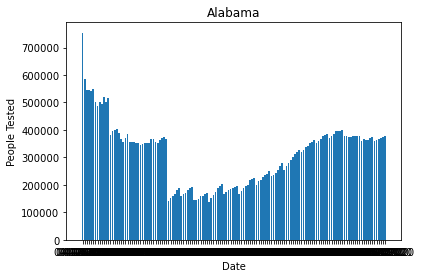

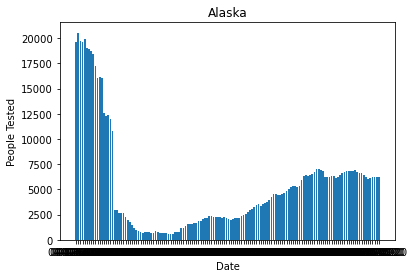

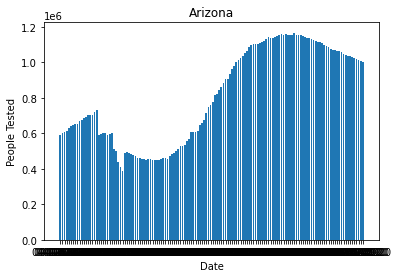

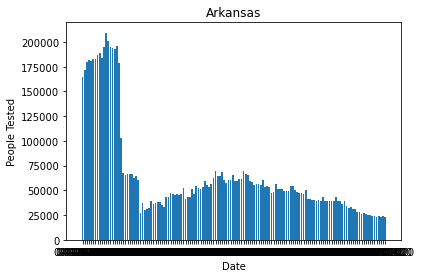

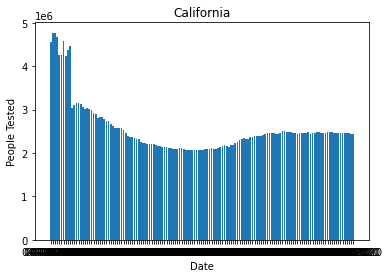

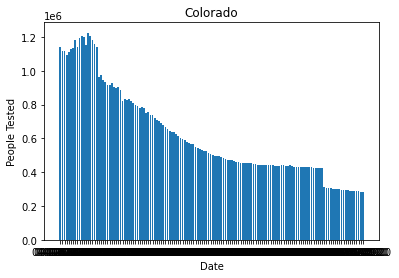

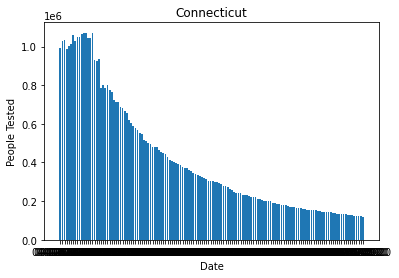

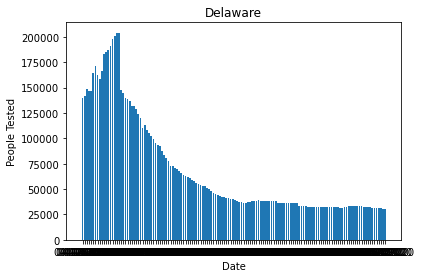

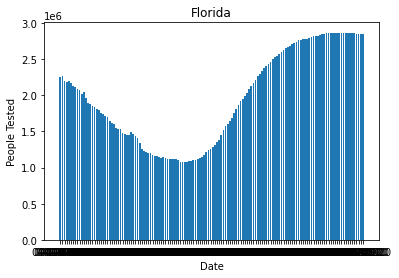

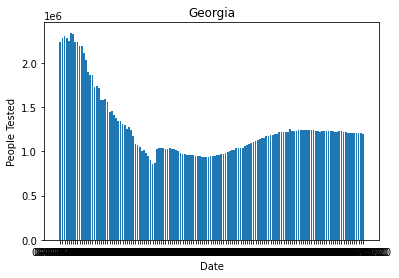

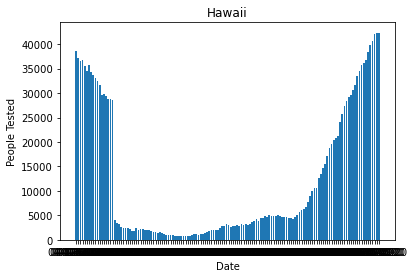

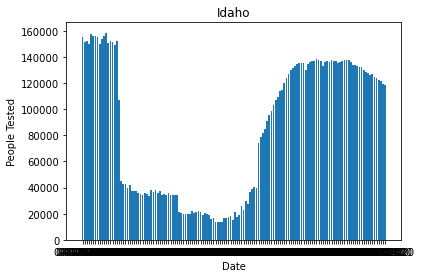

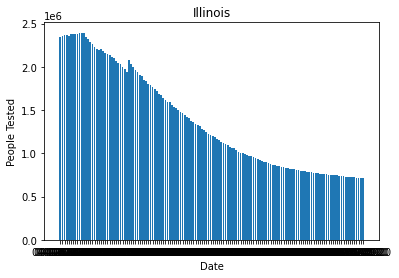

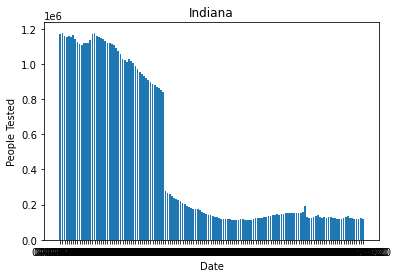

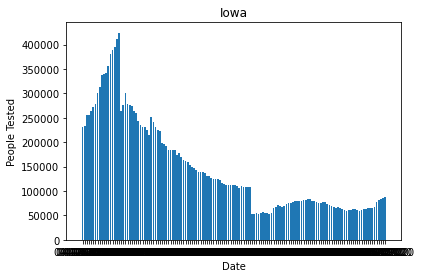

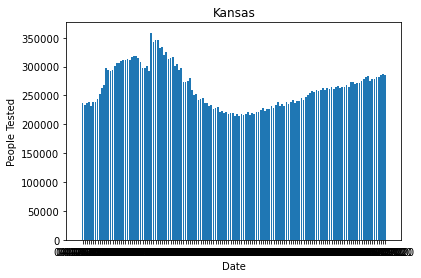

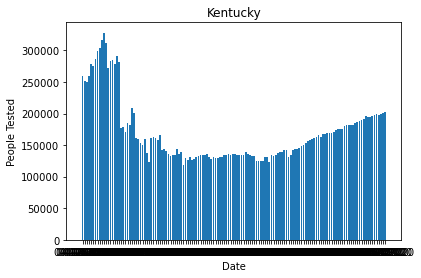

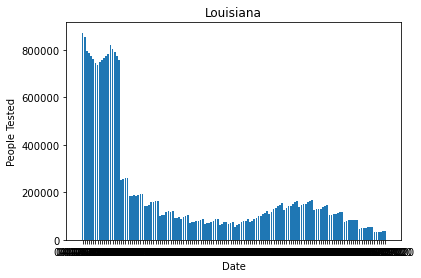

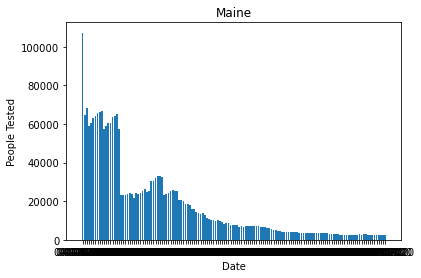

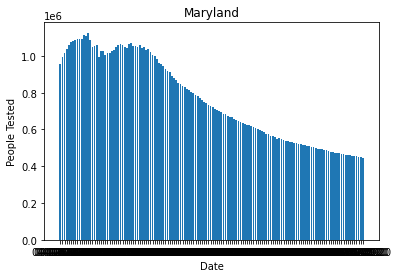

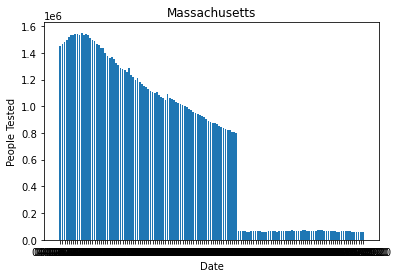

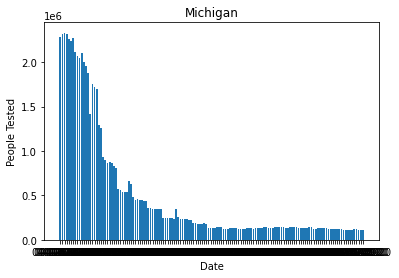

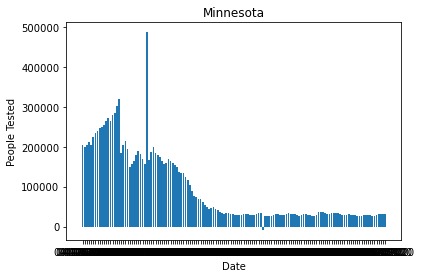

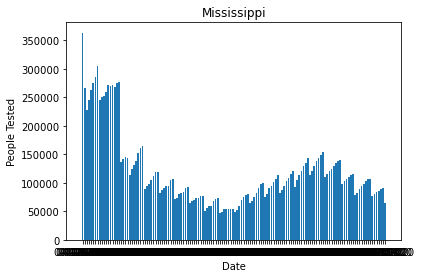

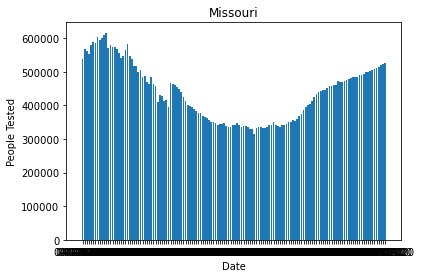

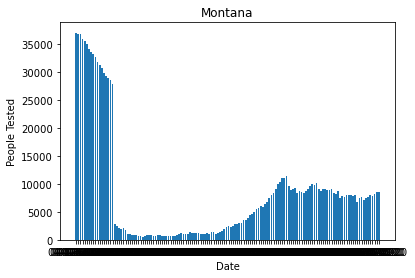

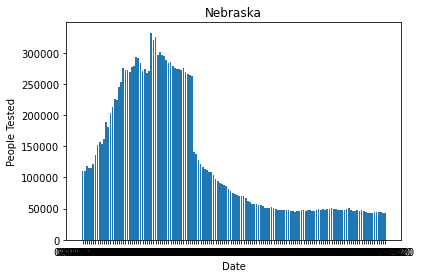

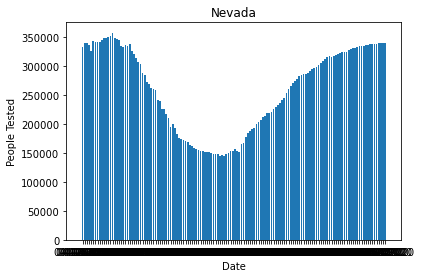

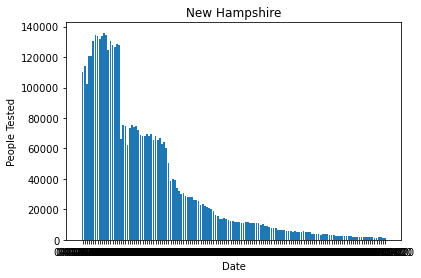

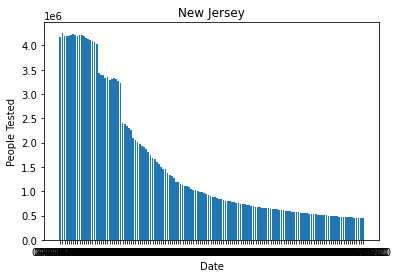

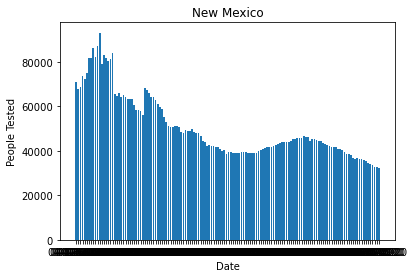

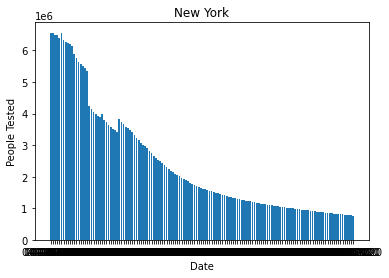

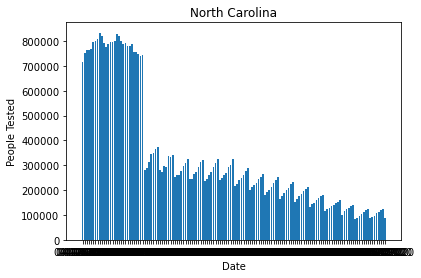

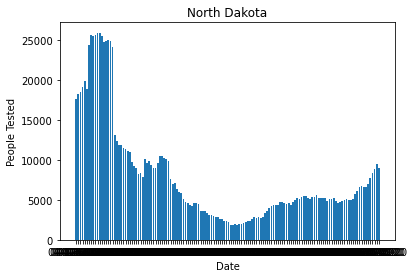

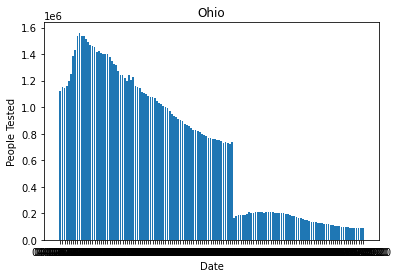

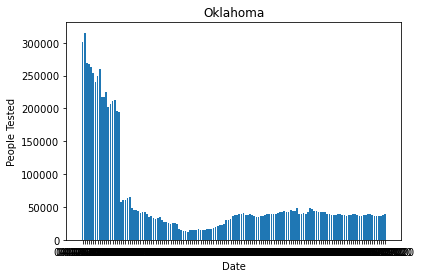

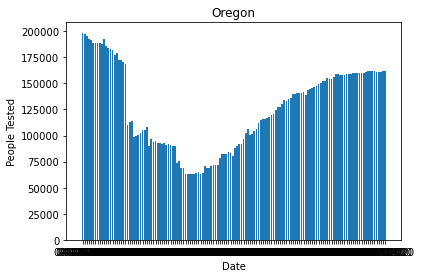

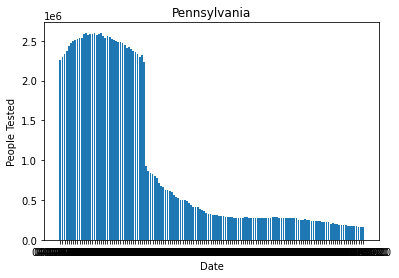

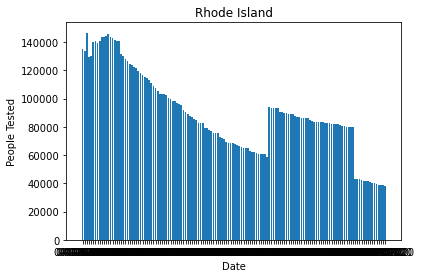

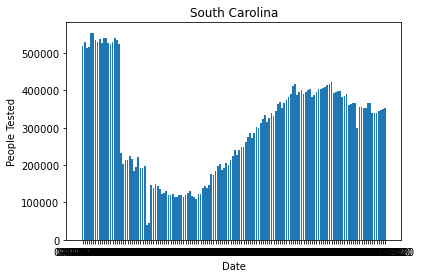

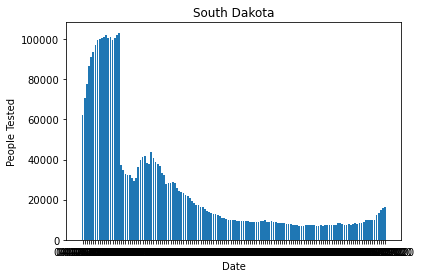

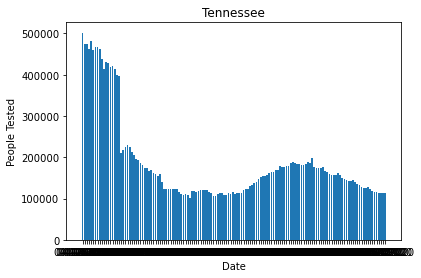

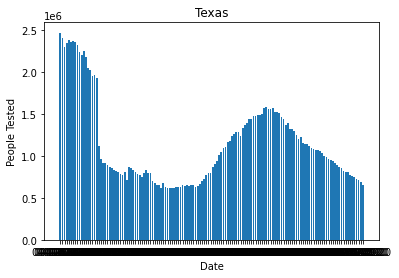

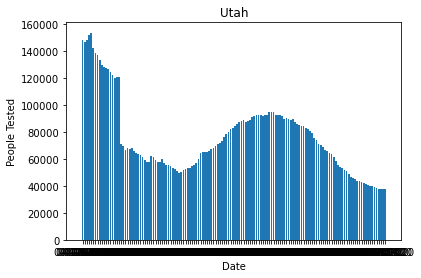

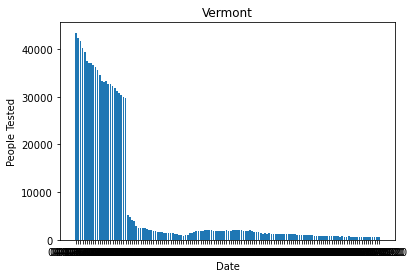

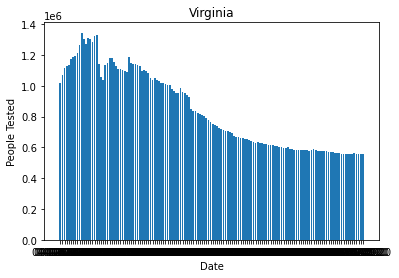

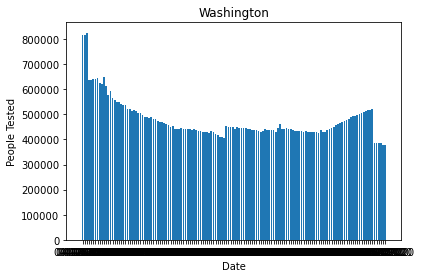

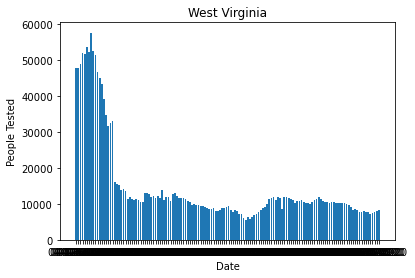

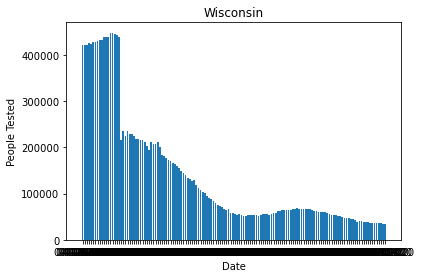

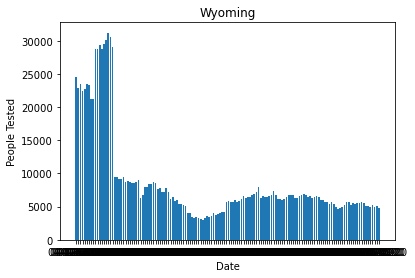

In [11]:
#run this block for date v/s test per state
for curr_state in train_import['Province_State'].unique():
    state = train_import.loc[train_import['Province_State'] == curr_state]
    fig, axl = plt.subplots()
    axl.title.set_text(curr_state)
    plt.xlabel('Date')
    plt.ylabel('People Tested')
    axl.bar(state['Date'].to_list(), state['Active/People_Tested*Population'].to_list())


plt.show()

<ipython-input-32-c5e044090cf4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots()


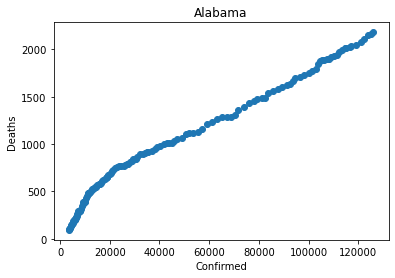

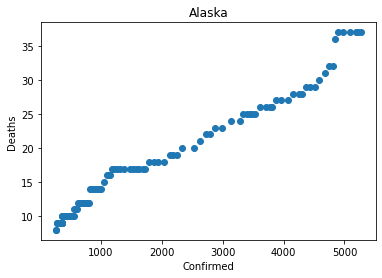

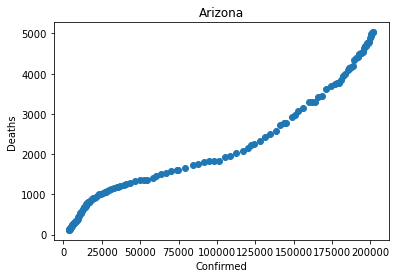

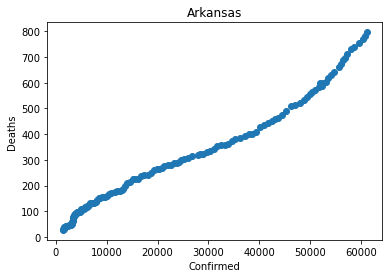

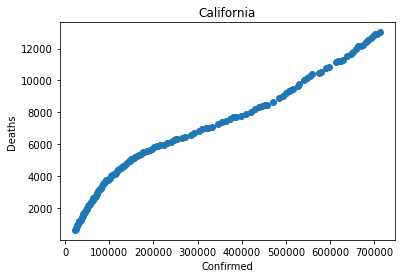

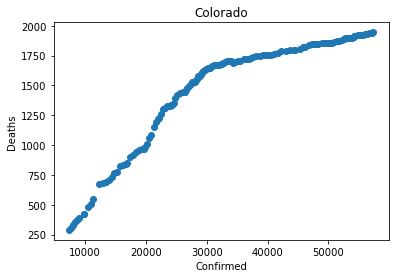

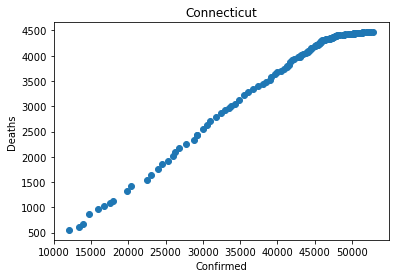

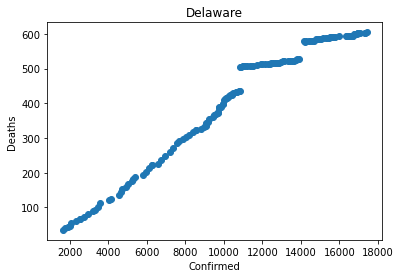

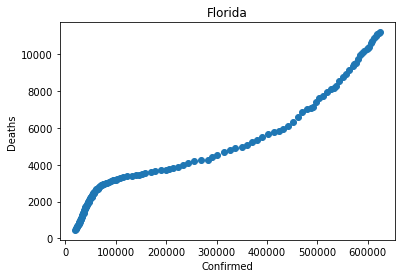

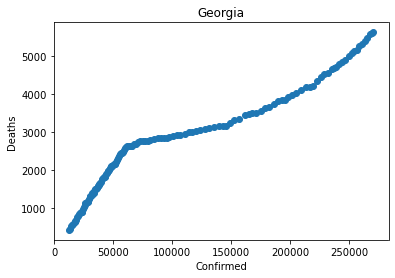

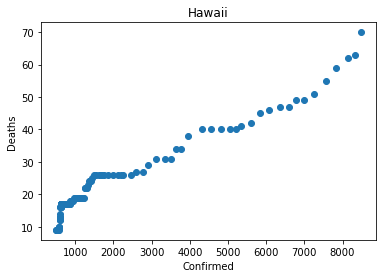

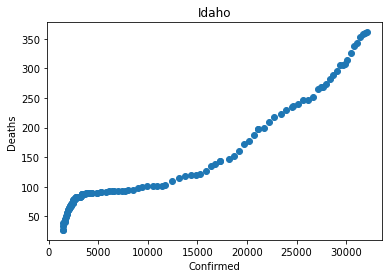

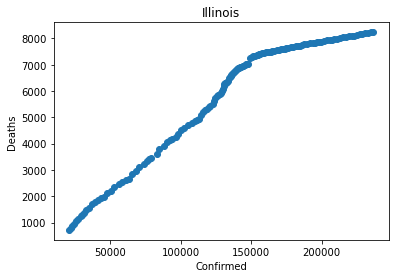

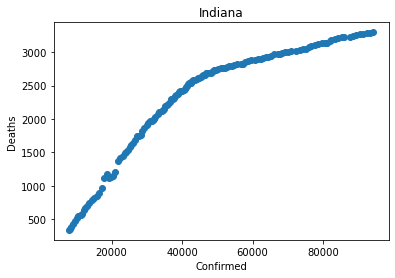

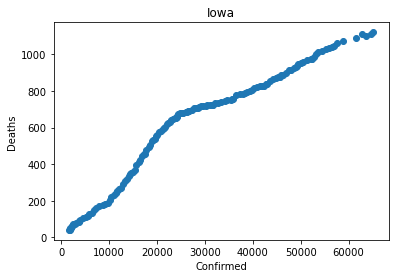

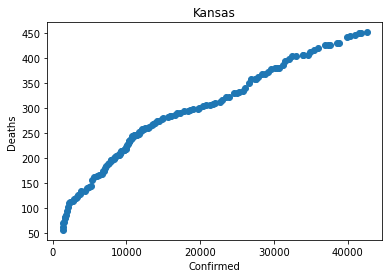

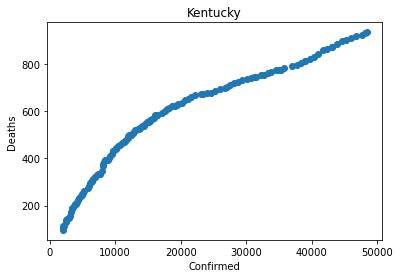

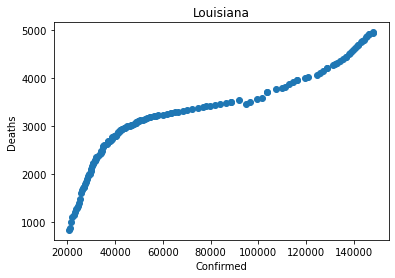

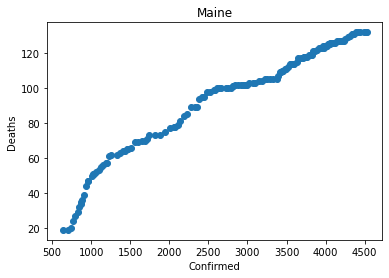

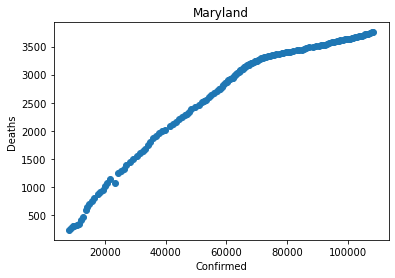

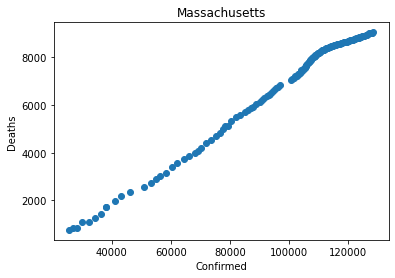

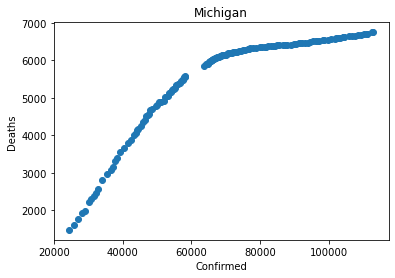

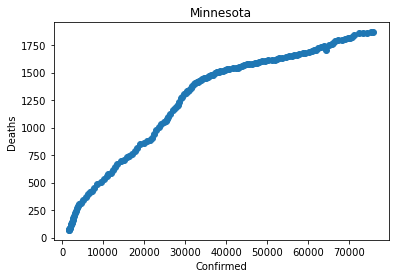

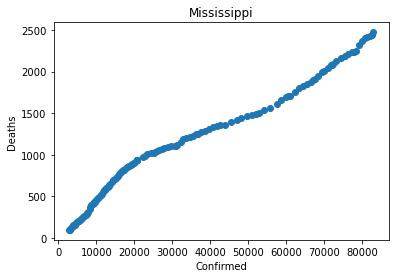

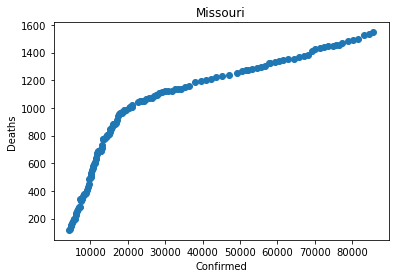

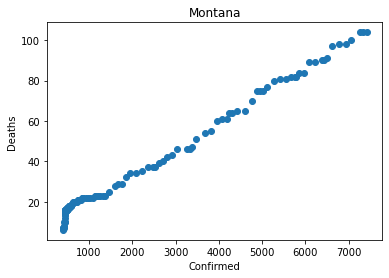

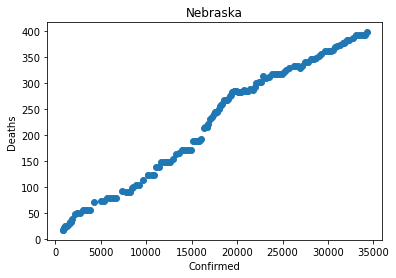

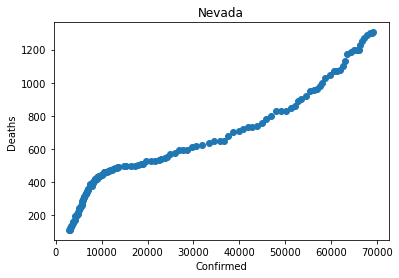

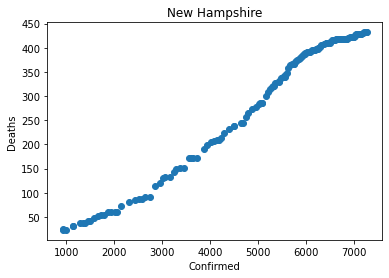

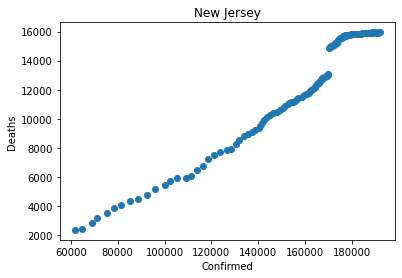

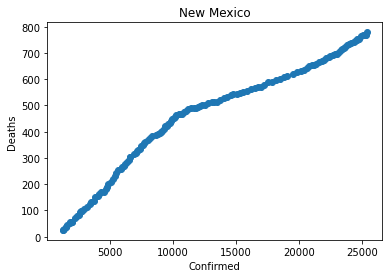

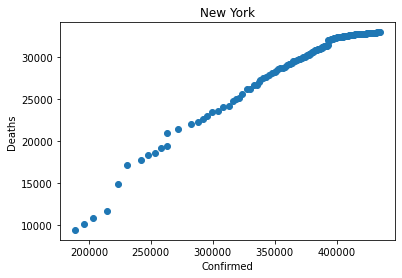

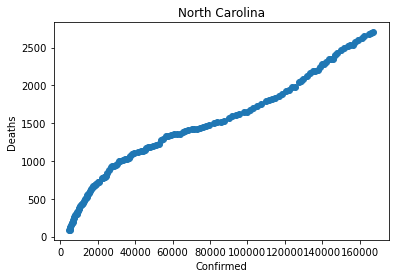

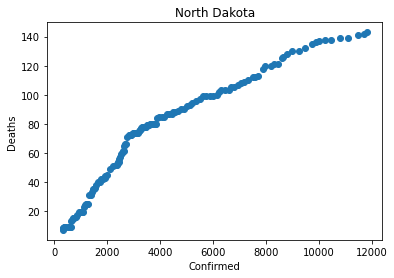

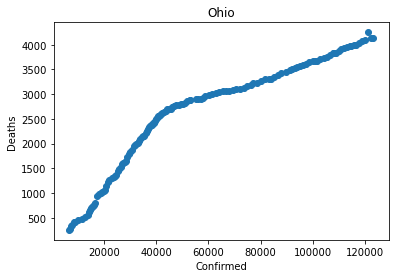

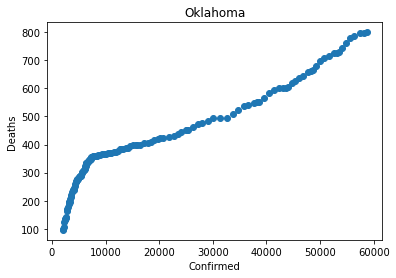

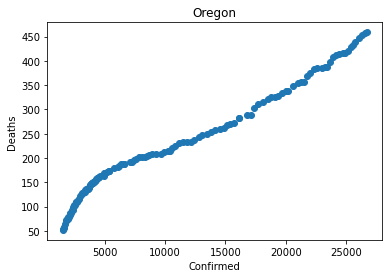

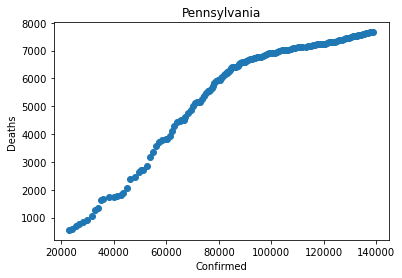

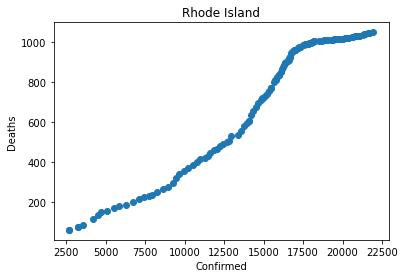

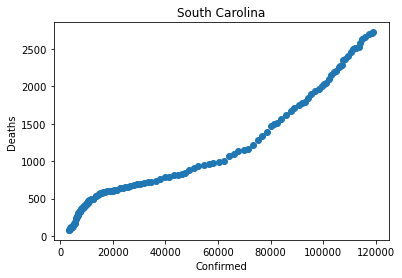

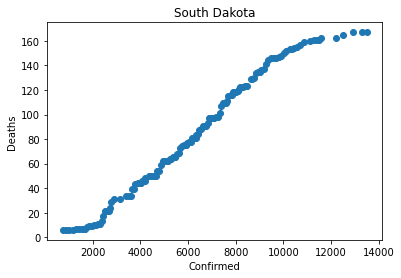

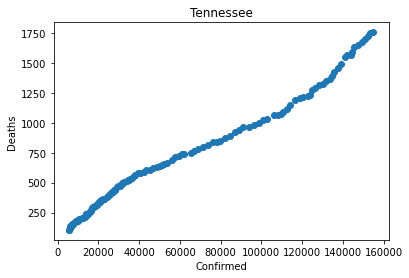

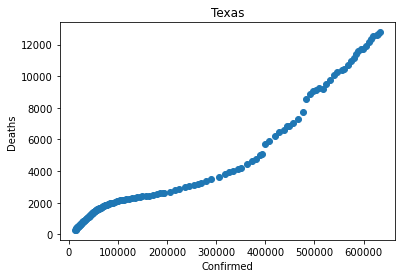

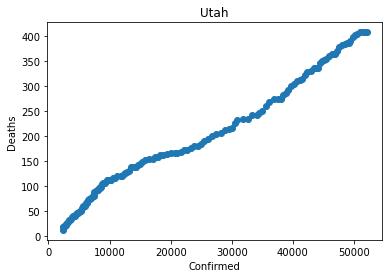

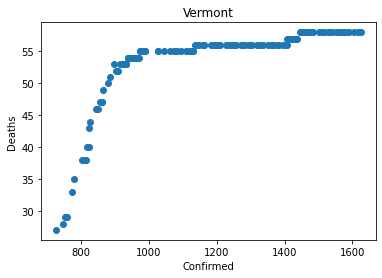

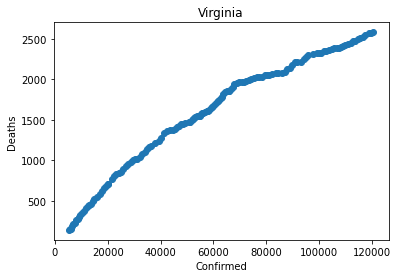

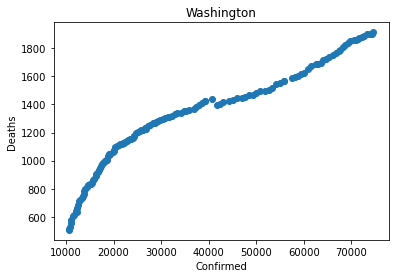

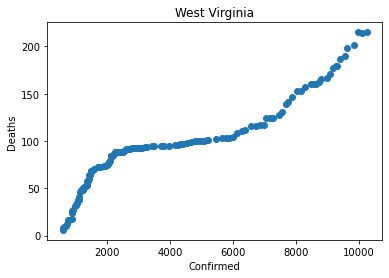

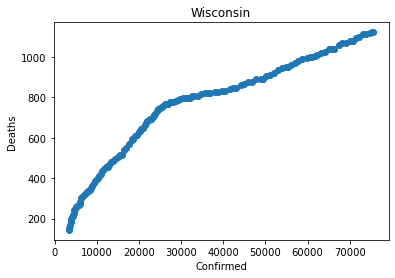

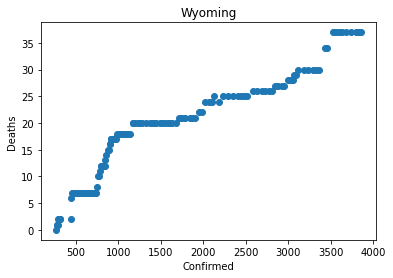

In [32]:
#run this block for confirmed cases vs. deaths per state
for curr_state in train_import['Province_State'].unique():
    fig, axs = plt.subplots()
    axs.title.set_text(curr_state)
    plt.xlabel('Confirmed')
    plt.ylabel('Deaths')
    state = train_import.loc[train_import['Province_State'] == curr_state]
    axs.scatter(state['Confirmed'].to_list(), state['Deaths'].to_list())


plt.show()

<ipython-input-26-f69caa944917>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots()


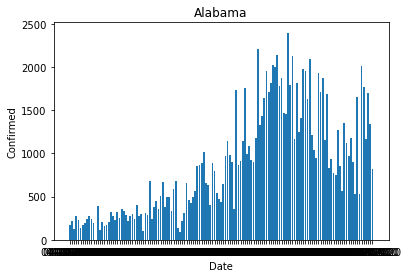

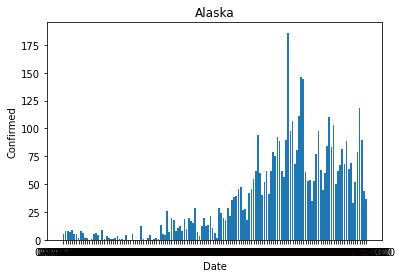

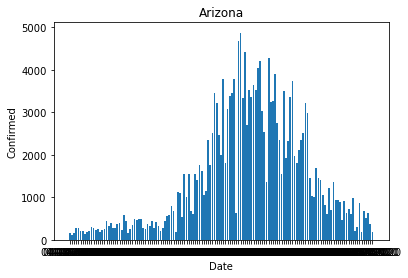

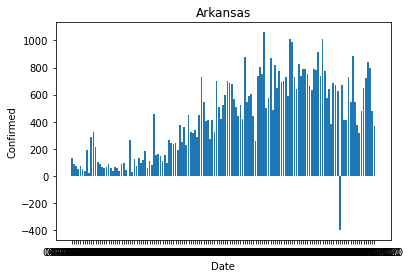

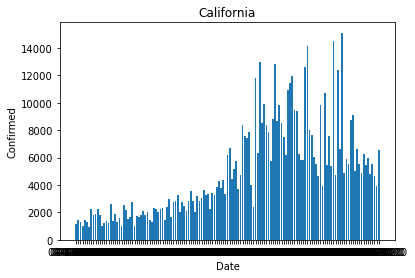

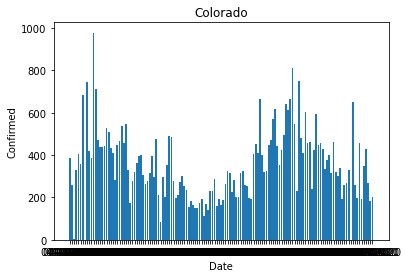

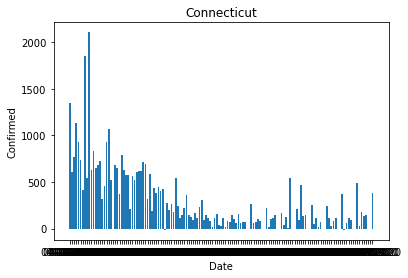

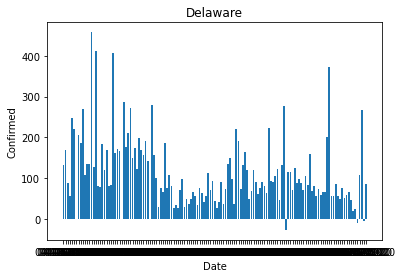

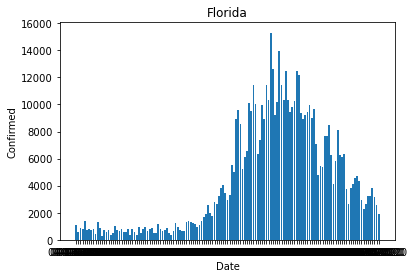

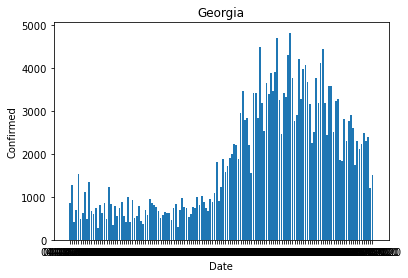

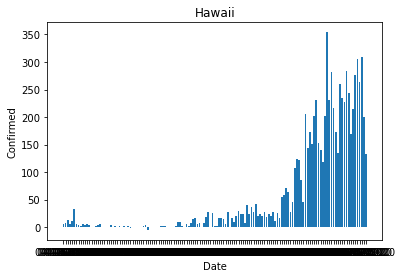

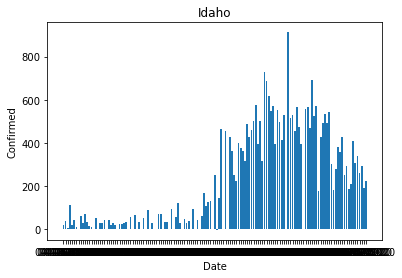

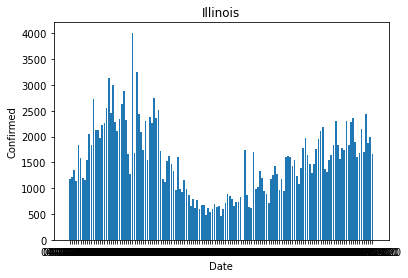

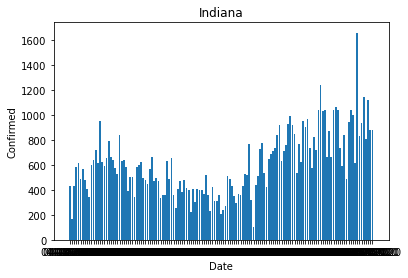

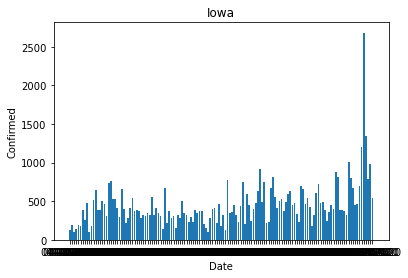

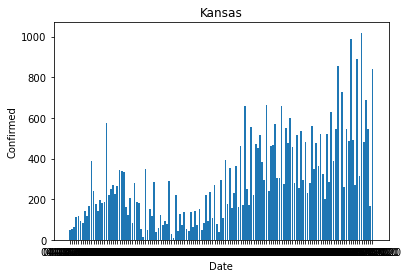

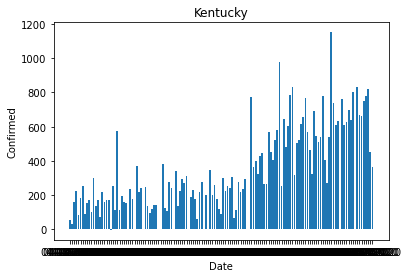

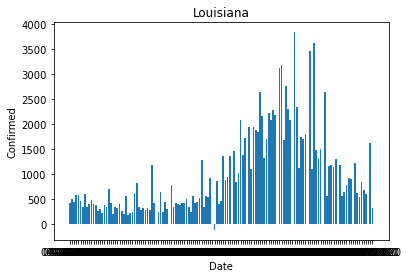

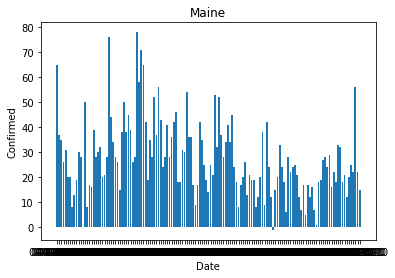

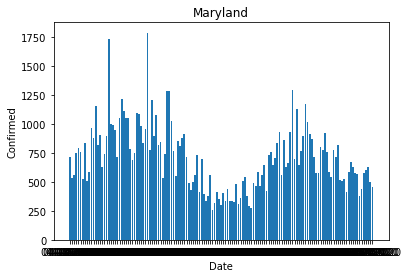

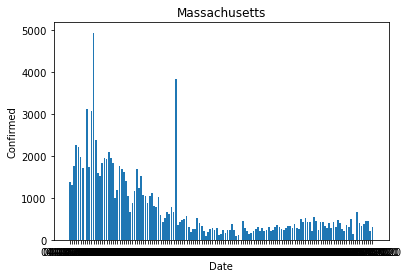

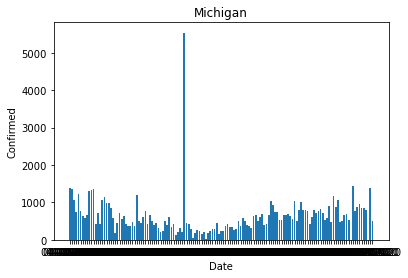

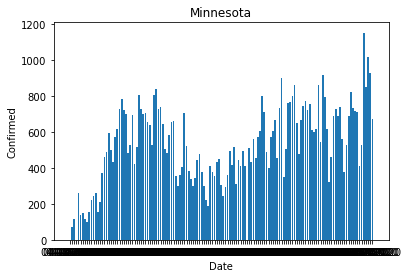

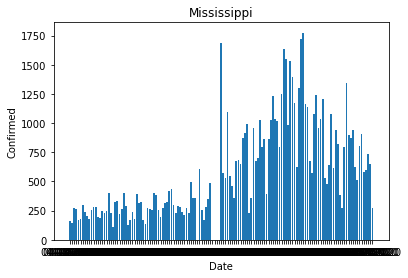

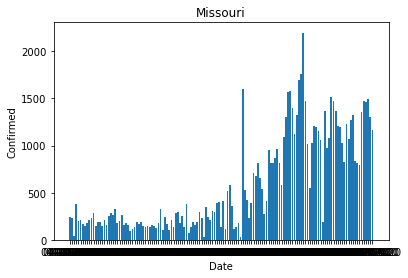

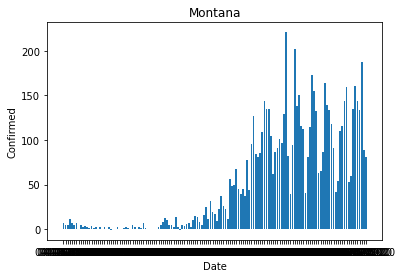

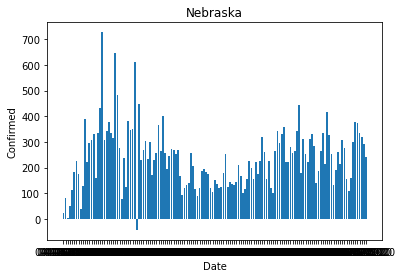

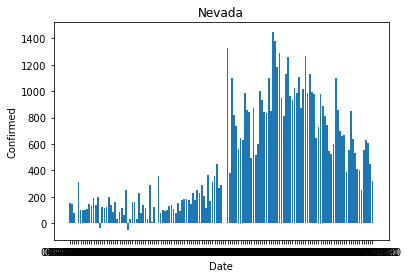

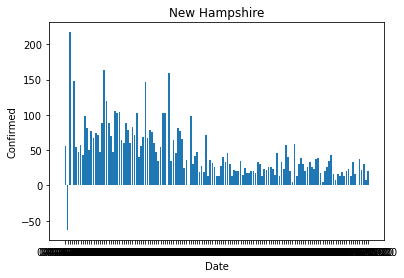

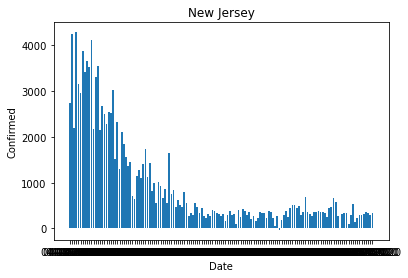

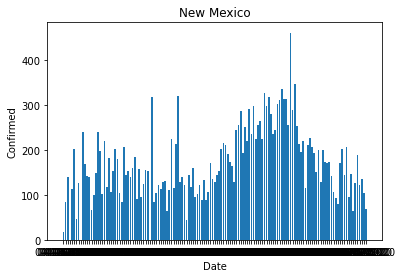

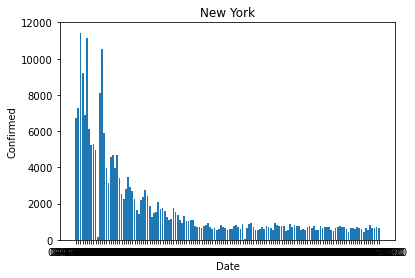

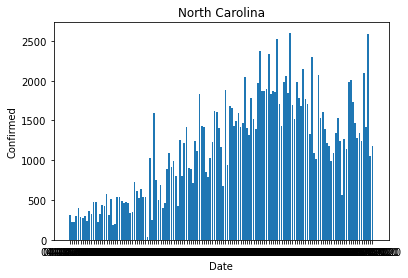

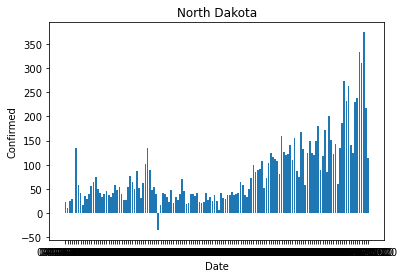

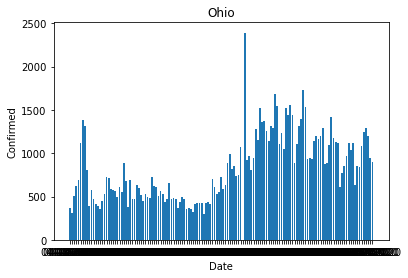

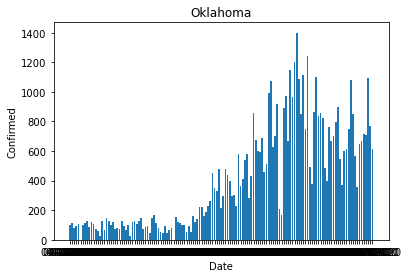

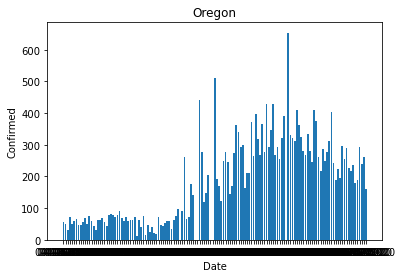

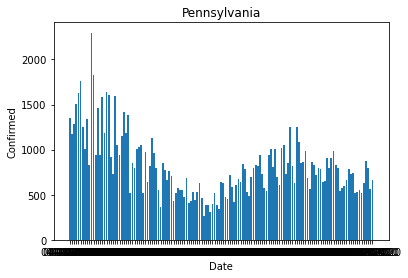

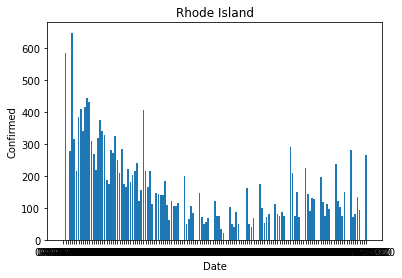

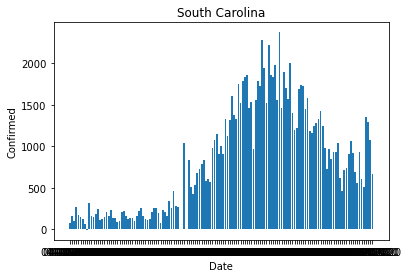

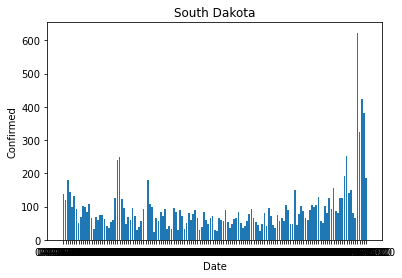

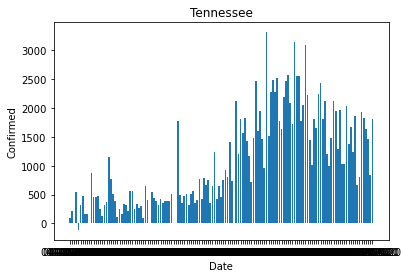

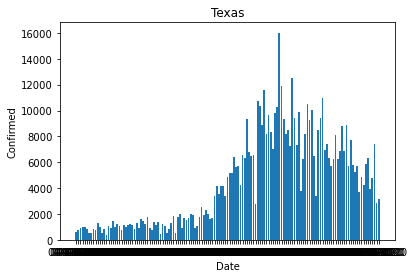

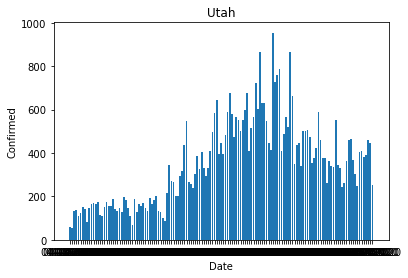

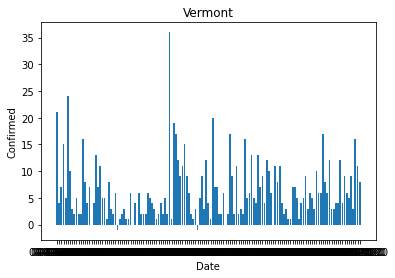

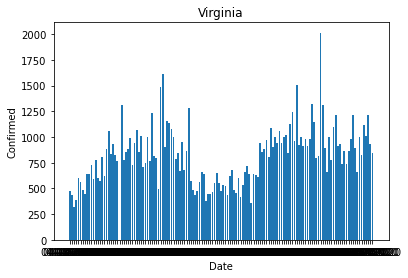

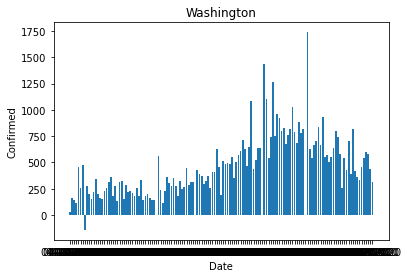

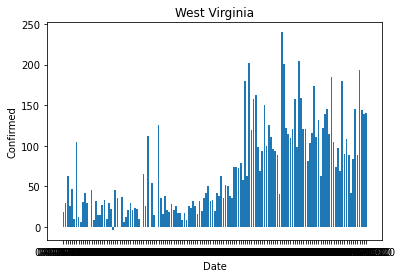

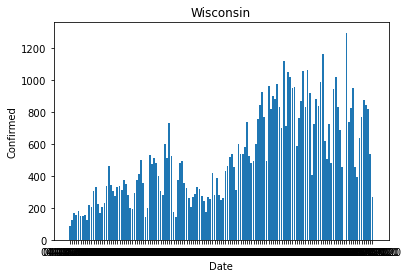

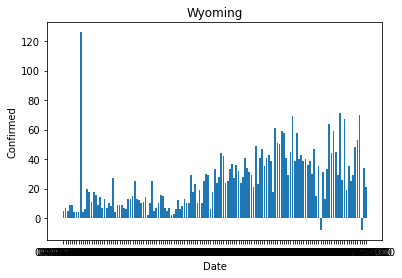

In [26]:
#run this block for dates vs. number new confirmed cases per state

for curr_state in train_import['Province_State'].unique():
    state = train_import.loc[train_import['Province_State'] == curr_state]
    confirmed = state['Confirmed'].to_list()
    daily = [confirmed[i+1]-confirmed[i] for i in range(len(confirmed)) if i != len(confirmed)-1]
    
    fig, axs = plt.subplots()
    axs.title.set_text(curr_state)
    plt.xlabel('Date')
    plt.ylabel('Confirmed')
    axs.bar(state['Date'].to_list()[1:], daily)


plt.show()

<ipython-input-29-9f3f30d83230>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axl = plt.subplots()


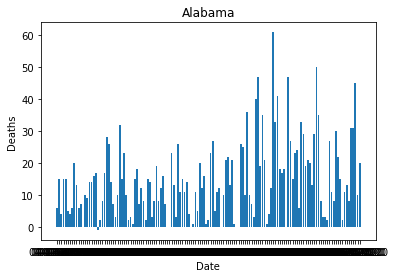

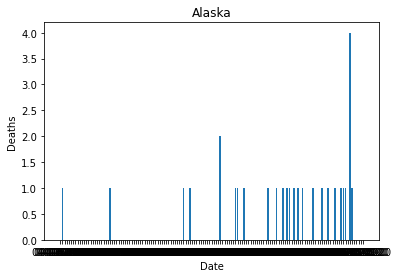

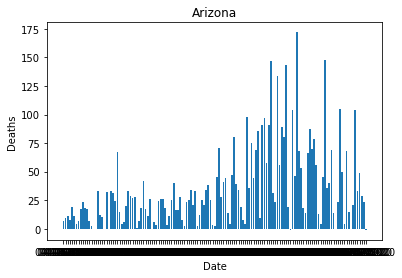

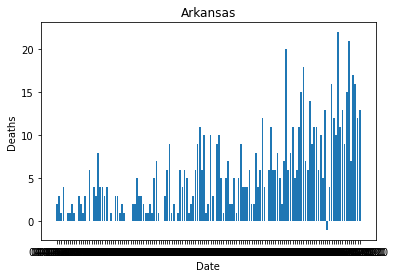

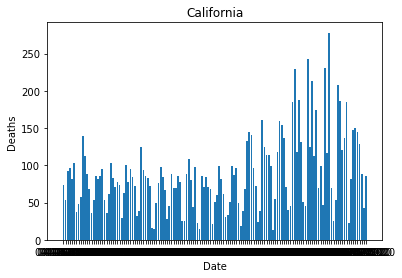

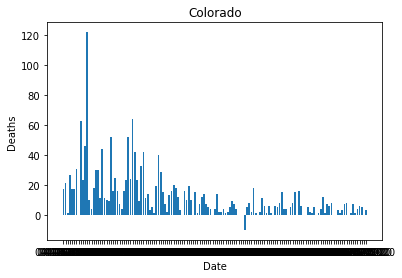

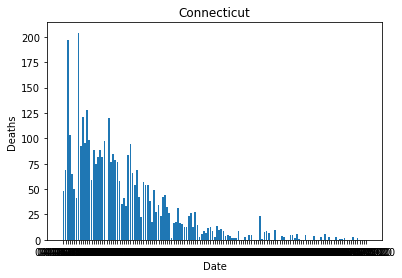

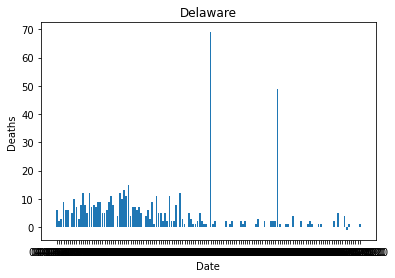

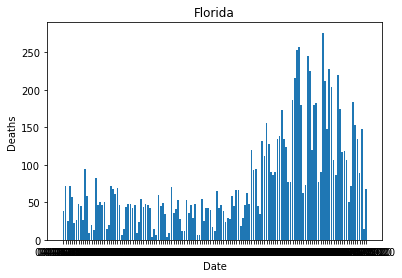

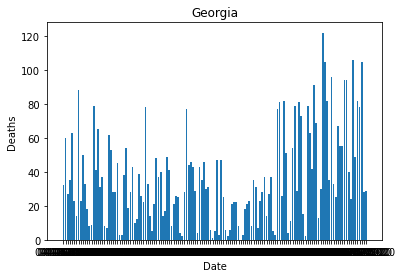

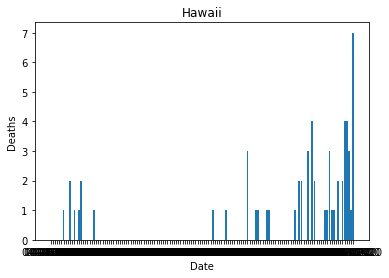

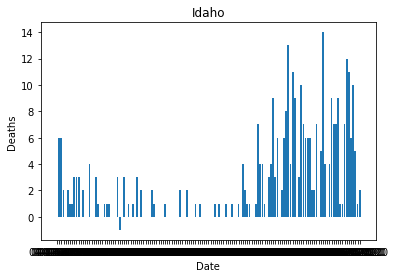

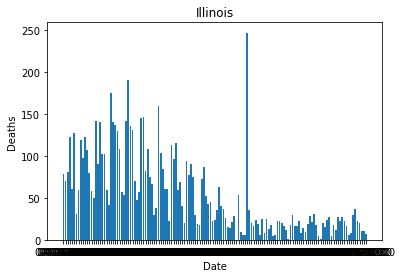

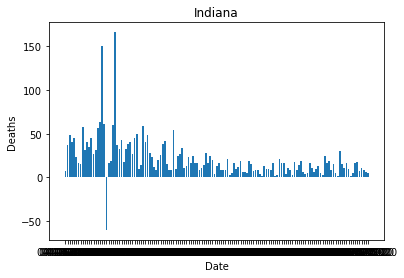

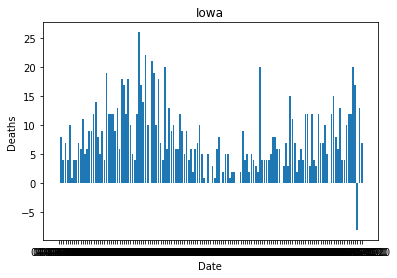

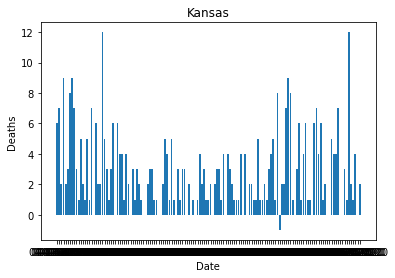

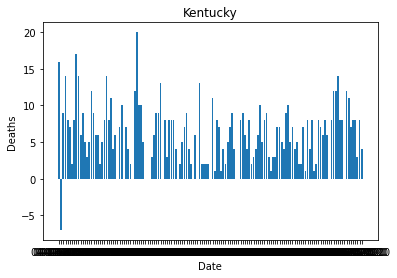

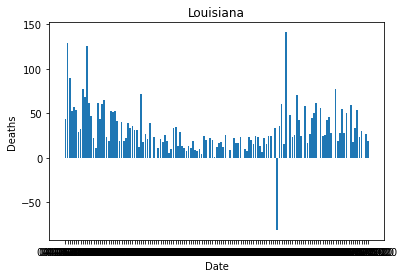

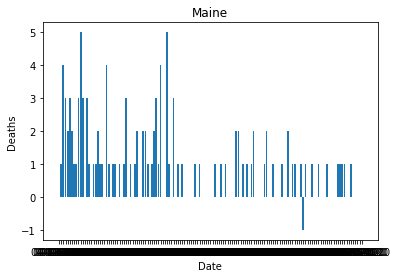

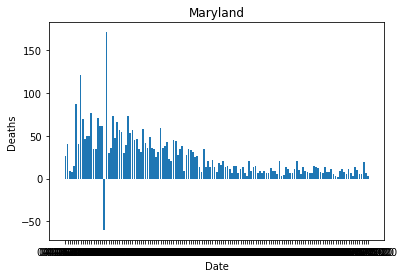

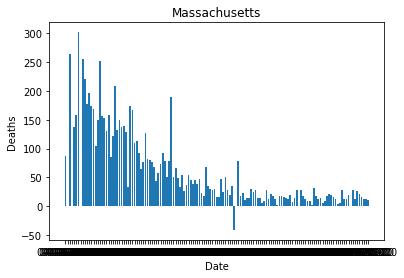

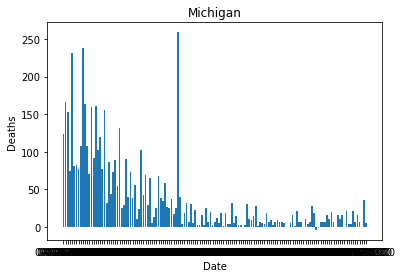

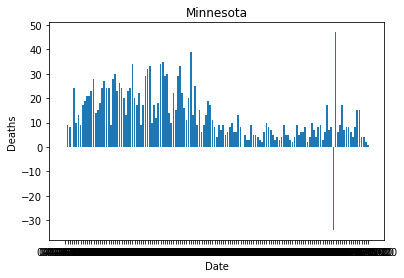

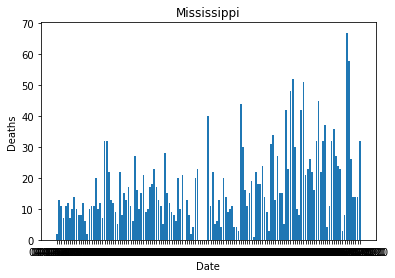

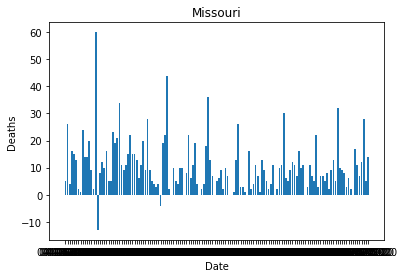

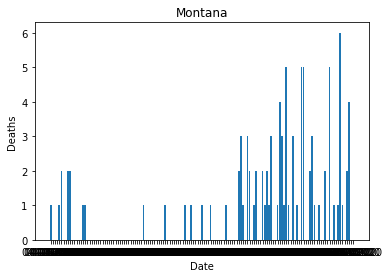

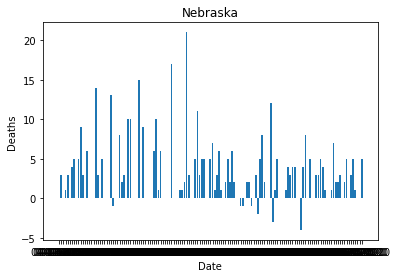

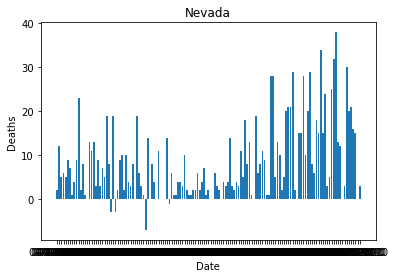

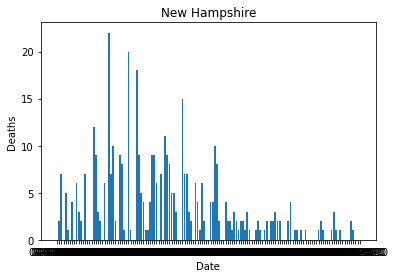

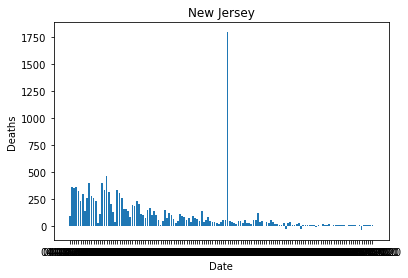

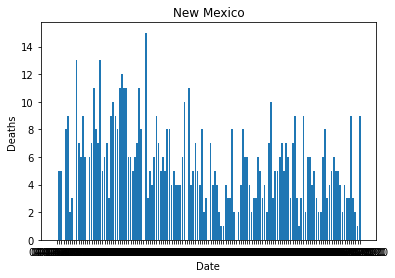

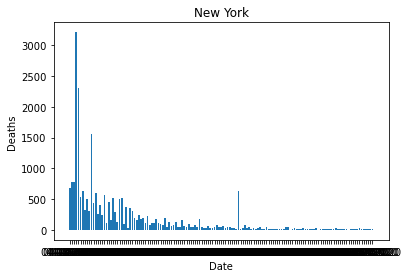

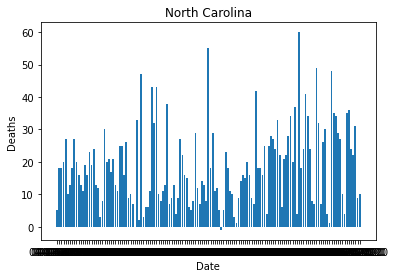

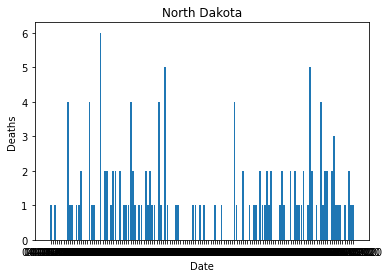

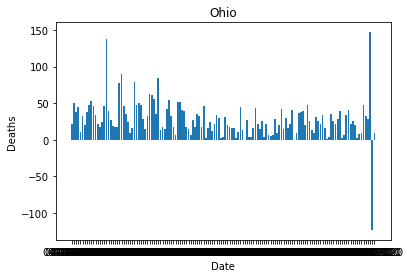

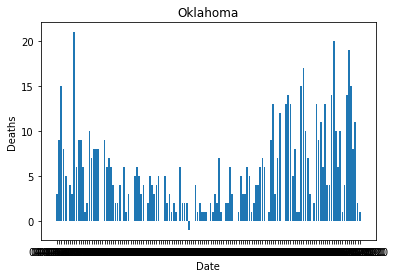

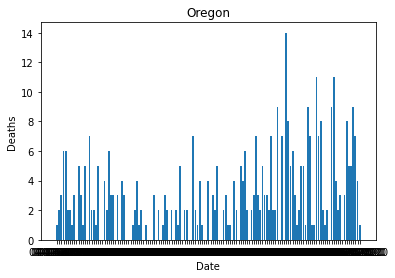

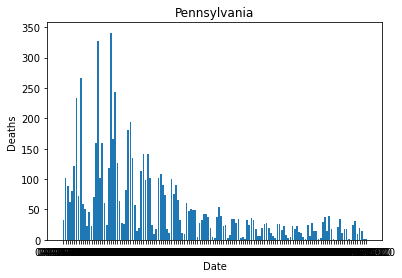

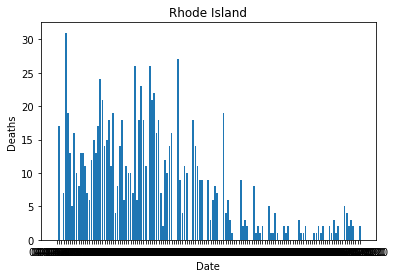

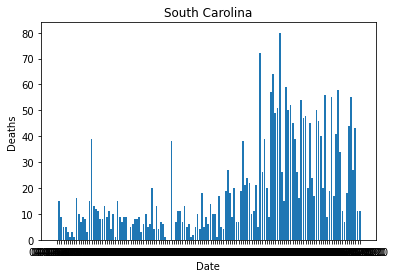

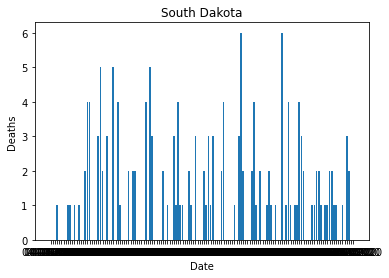

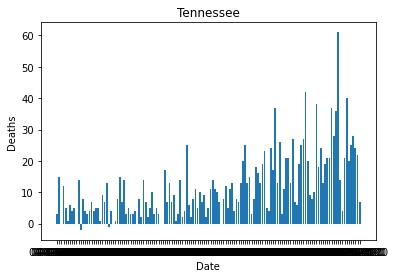

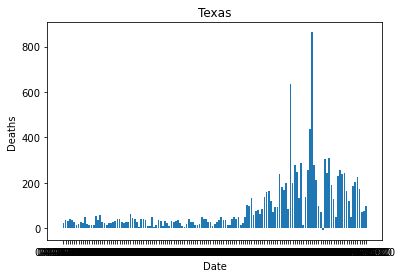

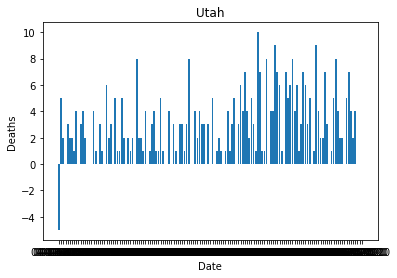

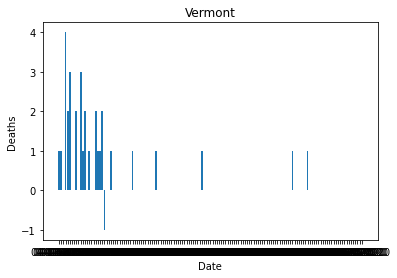

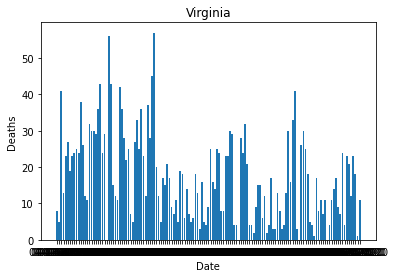

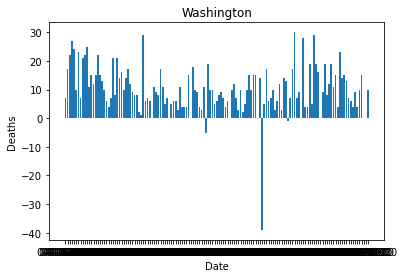

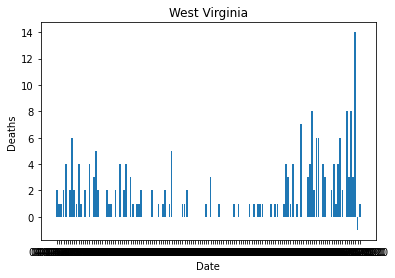

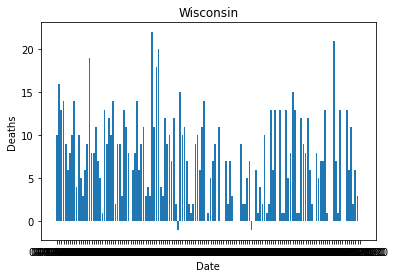

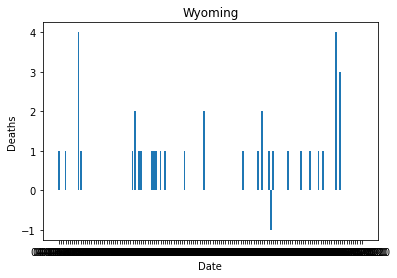

In [29]:
#run this block for dates vs. number new deaths per state
for curr_state in train_import['Province_State'].unique():
    state = train_import.loc[train_import['Province_State'] == curr_state]
    deaths = state['Deaths'].to_list()
    daily = [deaths[i+1]-deaths[i] for i in range(len(deaths)) if i != len(deaths)-1]
    fig, axl = plt.subplots()
    axl.title.set_text(curr_state)
    plt.xlabel('Date')
    plt.ylabel('Deaths')
    axl.bar(state['Date'].to_list()[1:], daily)


plt.show()

<ipython-input-32-50568a7b0634>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axl = plt.subplots()


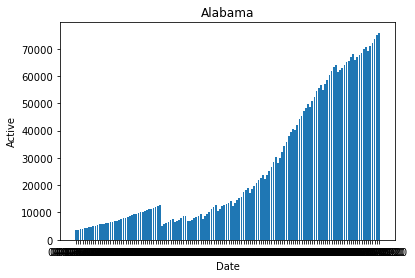

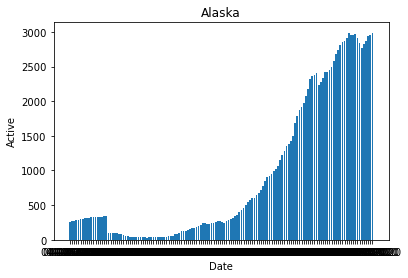

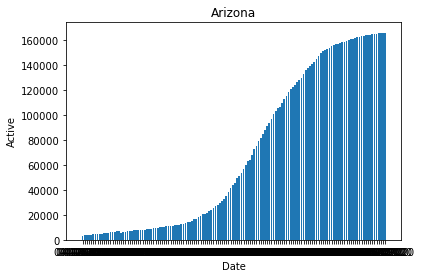

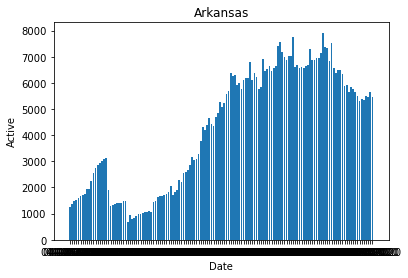

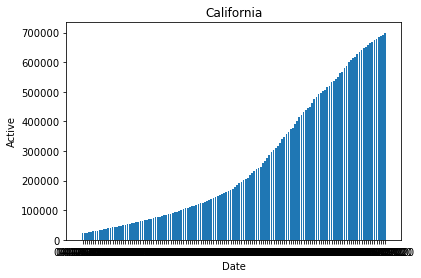

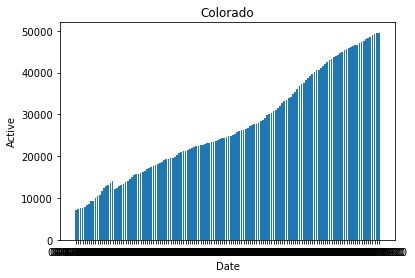

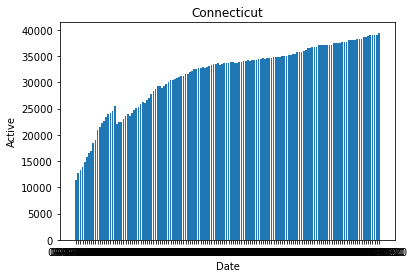

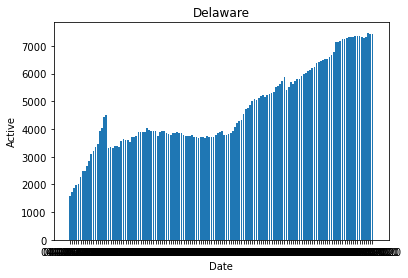

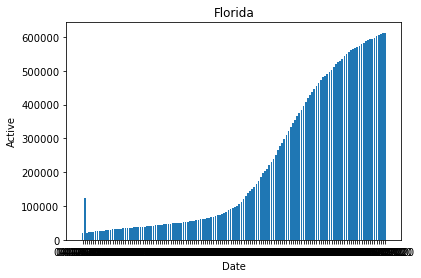

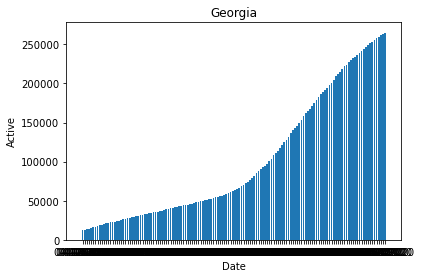

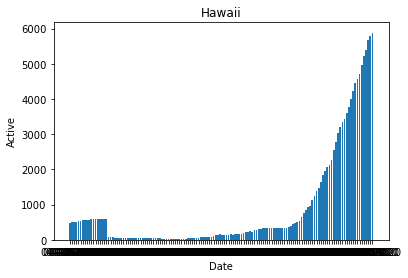

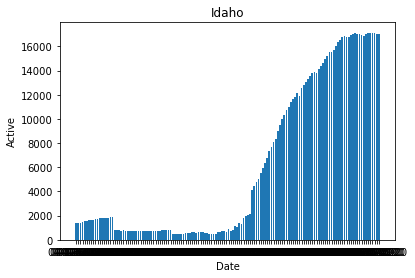

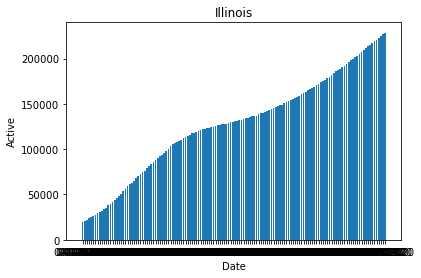

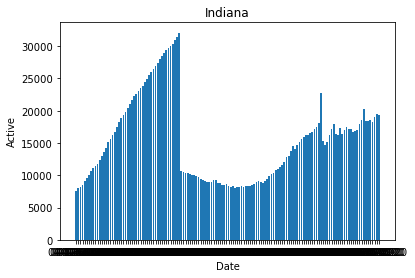

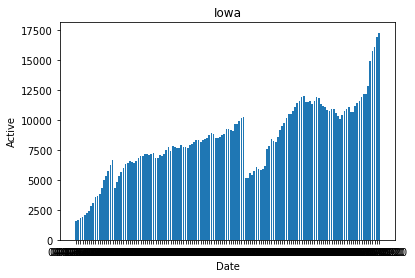

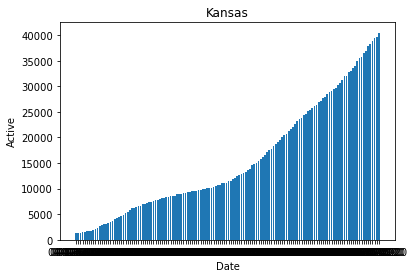

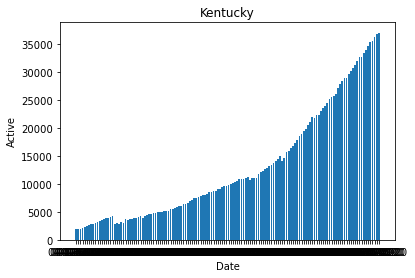

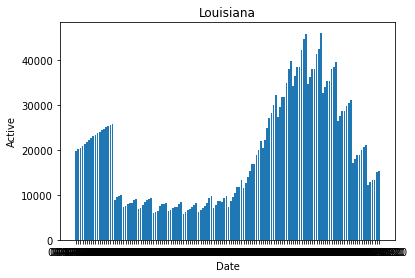

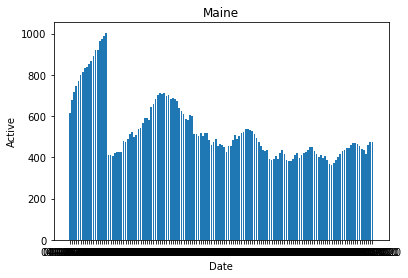

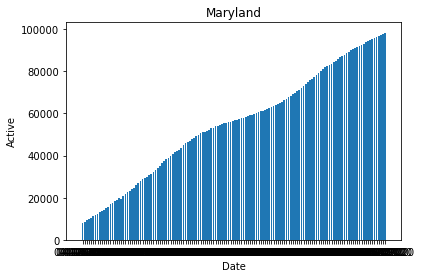

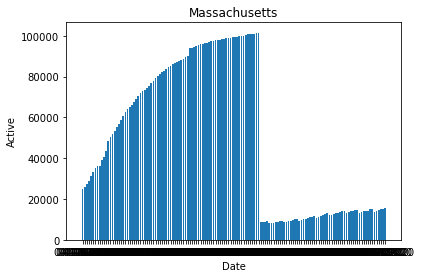

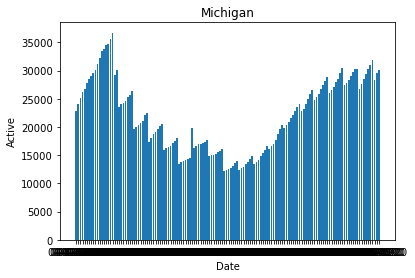

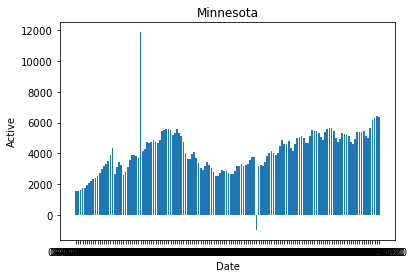

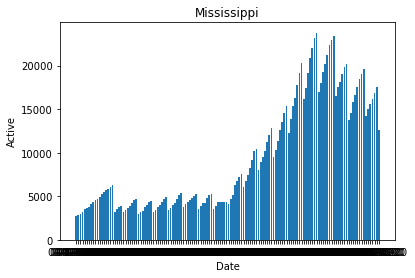

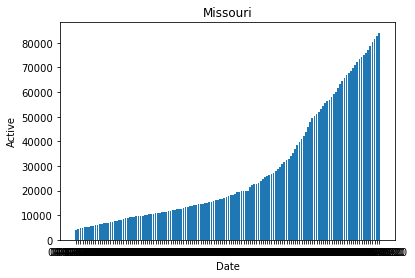

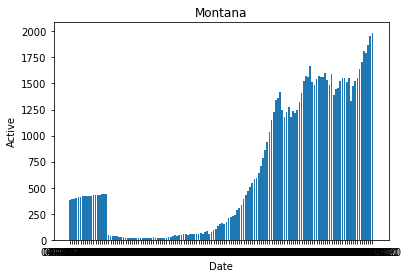

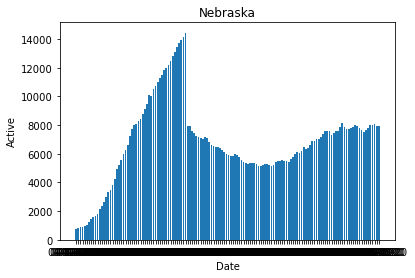

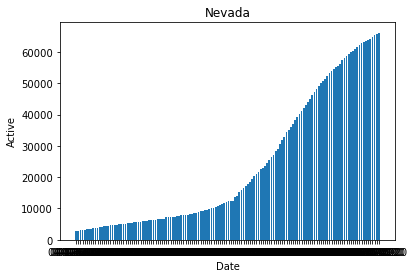

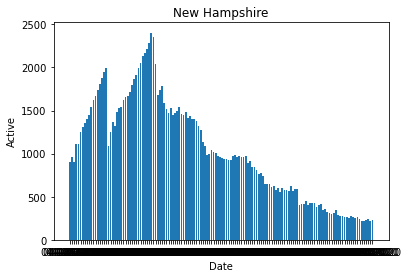

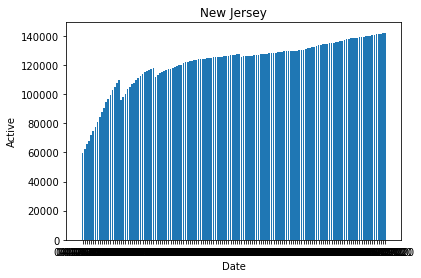

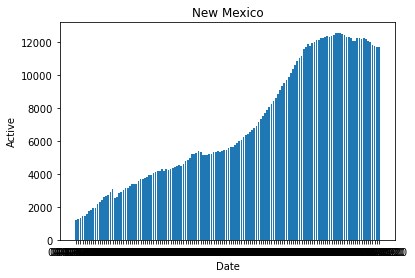

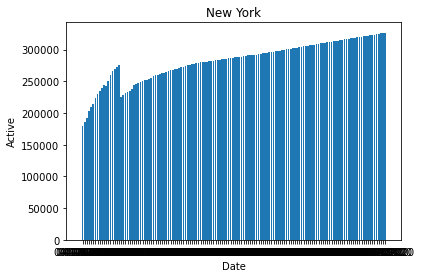

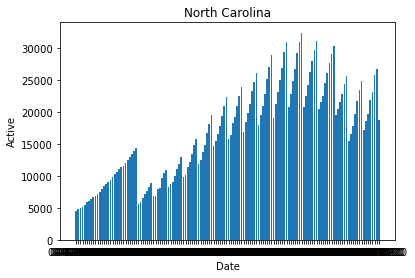

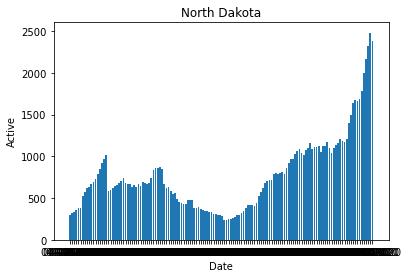

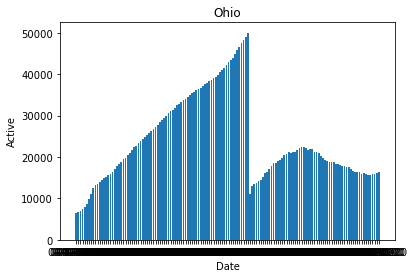

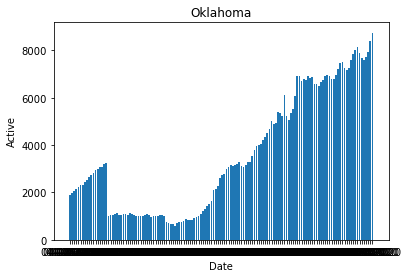

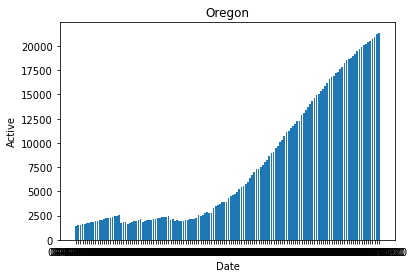

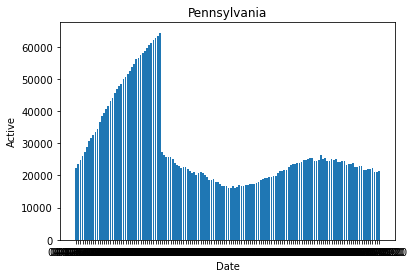

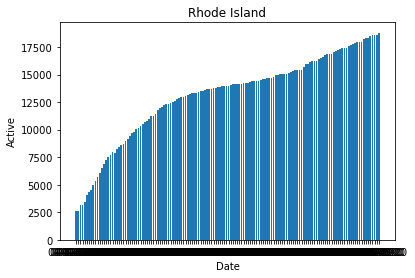

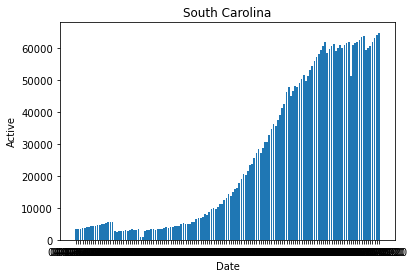

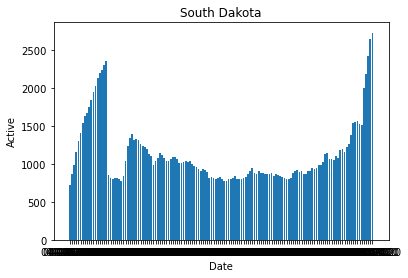

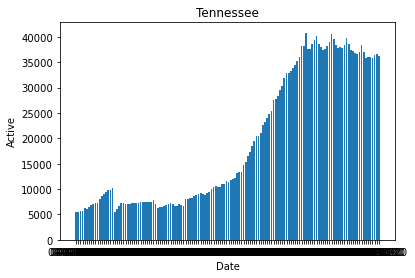

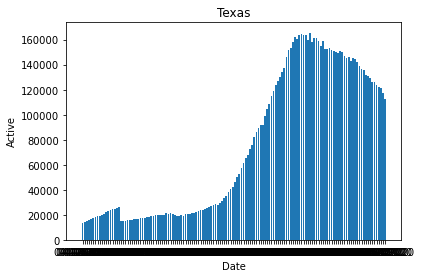

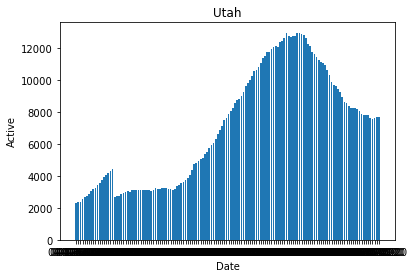

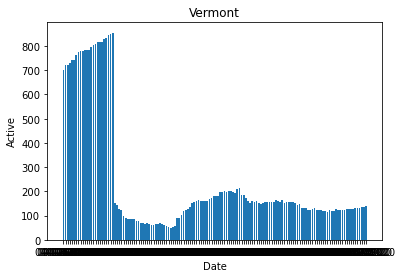

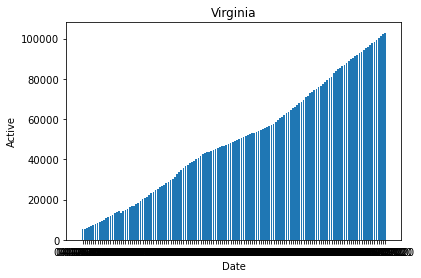

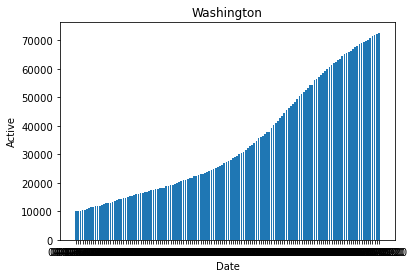

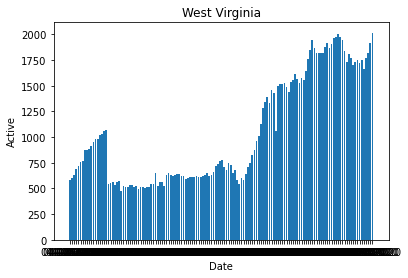

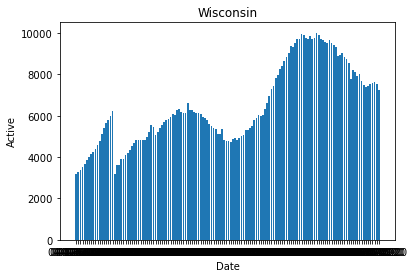

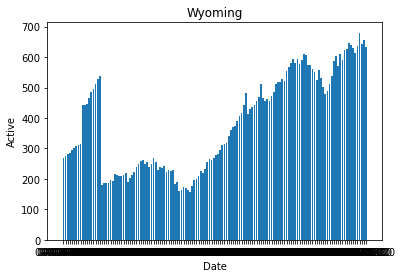

In [32]:
#run this block for dates vs. active cases per state
for curr_state in train_import['Province_State'].unique():
    state = train_import.loc[train_import['Province_State'] == curr_state]
    fig, axl = plt.subplots()
    axl.title.set_text(curr_state)
    plt.xlabel('Date')
    plt.ylabel('Active')
    axl.bar(state['Date'].to_list(), state['Active'].to_list())


plt.show()